In [ ]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [ ]:
# Load the dataset
data_path = 'dataset recycled aggregate natural fiber.csv'
data = pd.read_csv(data_path)

# Assuming the last column is the target variable and the rest are features
X = data[['Cem', 'W/B', 'FA',
              'CA', 'RCA', 'SCM',
              'SP', 'NF', 'Length', 'Age']]
y = data['CS']

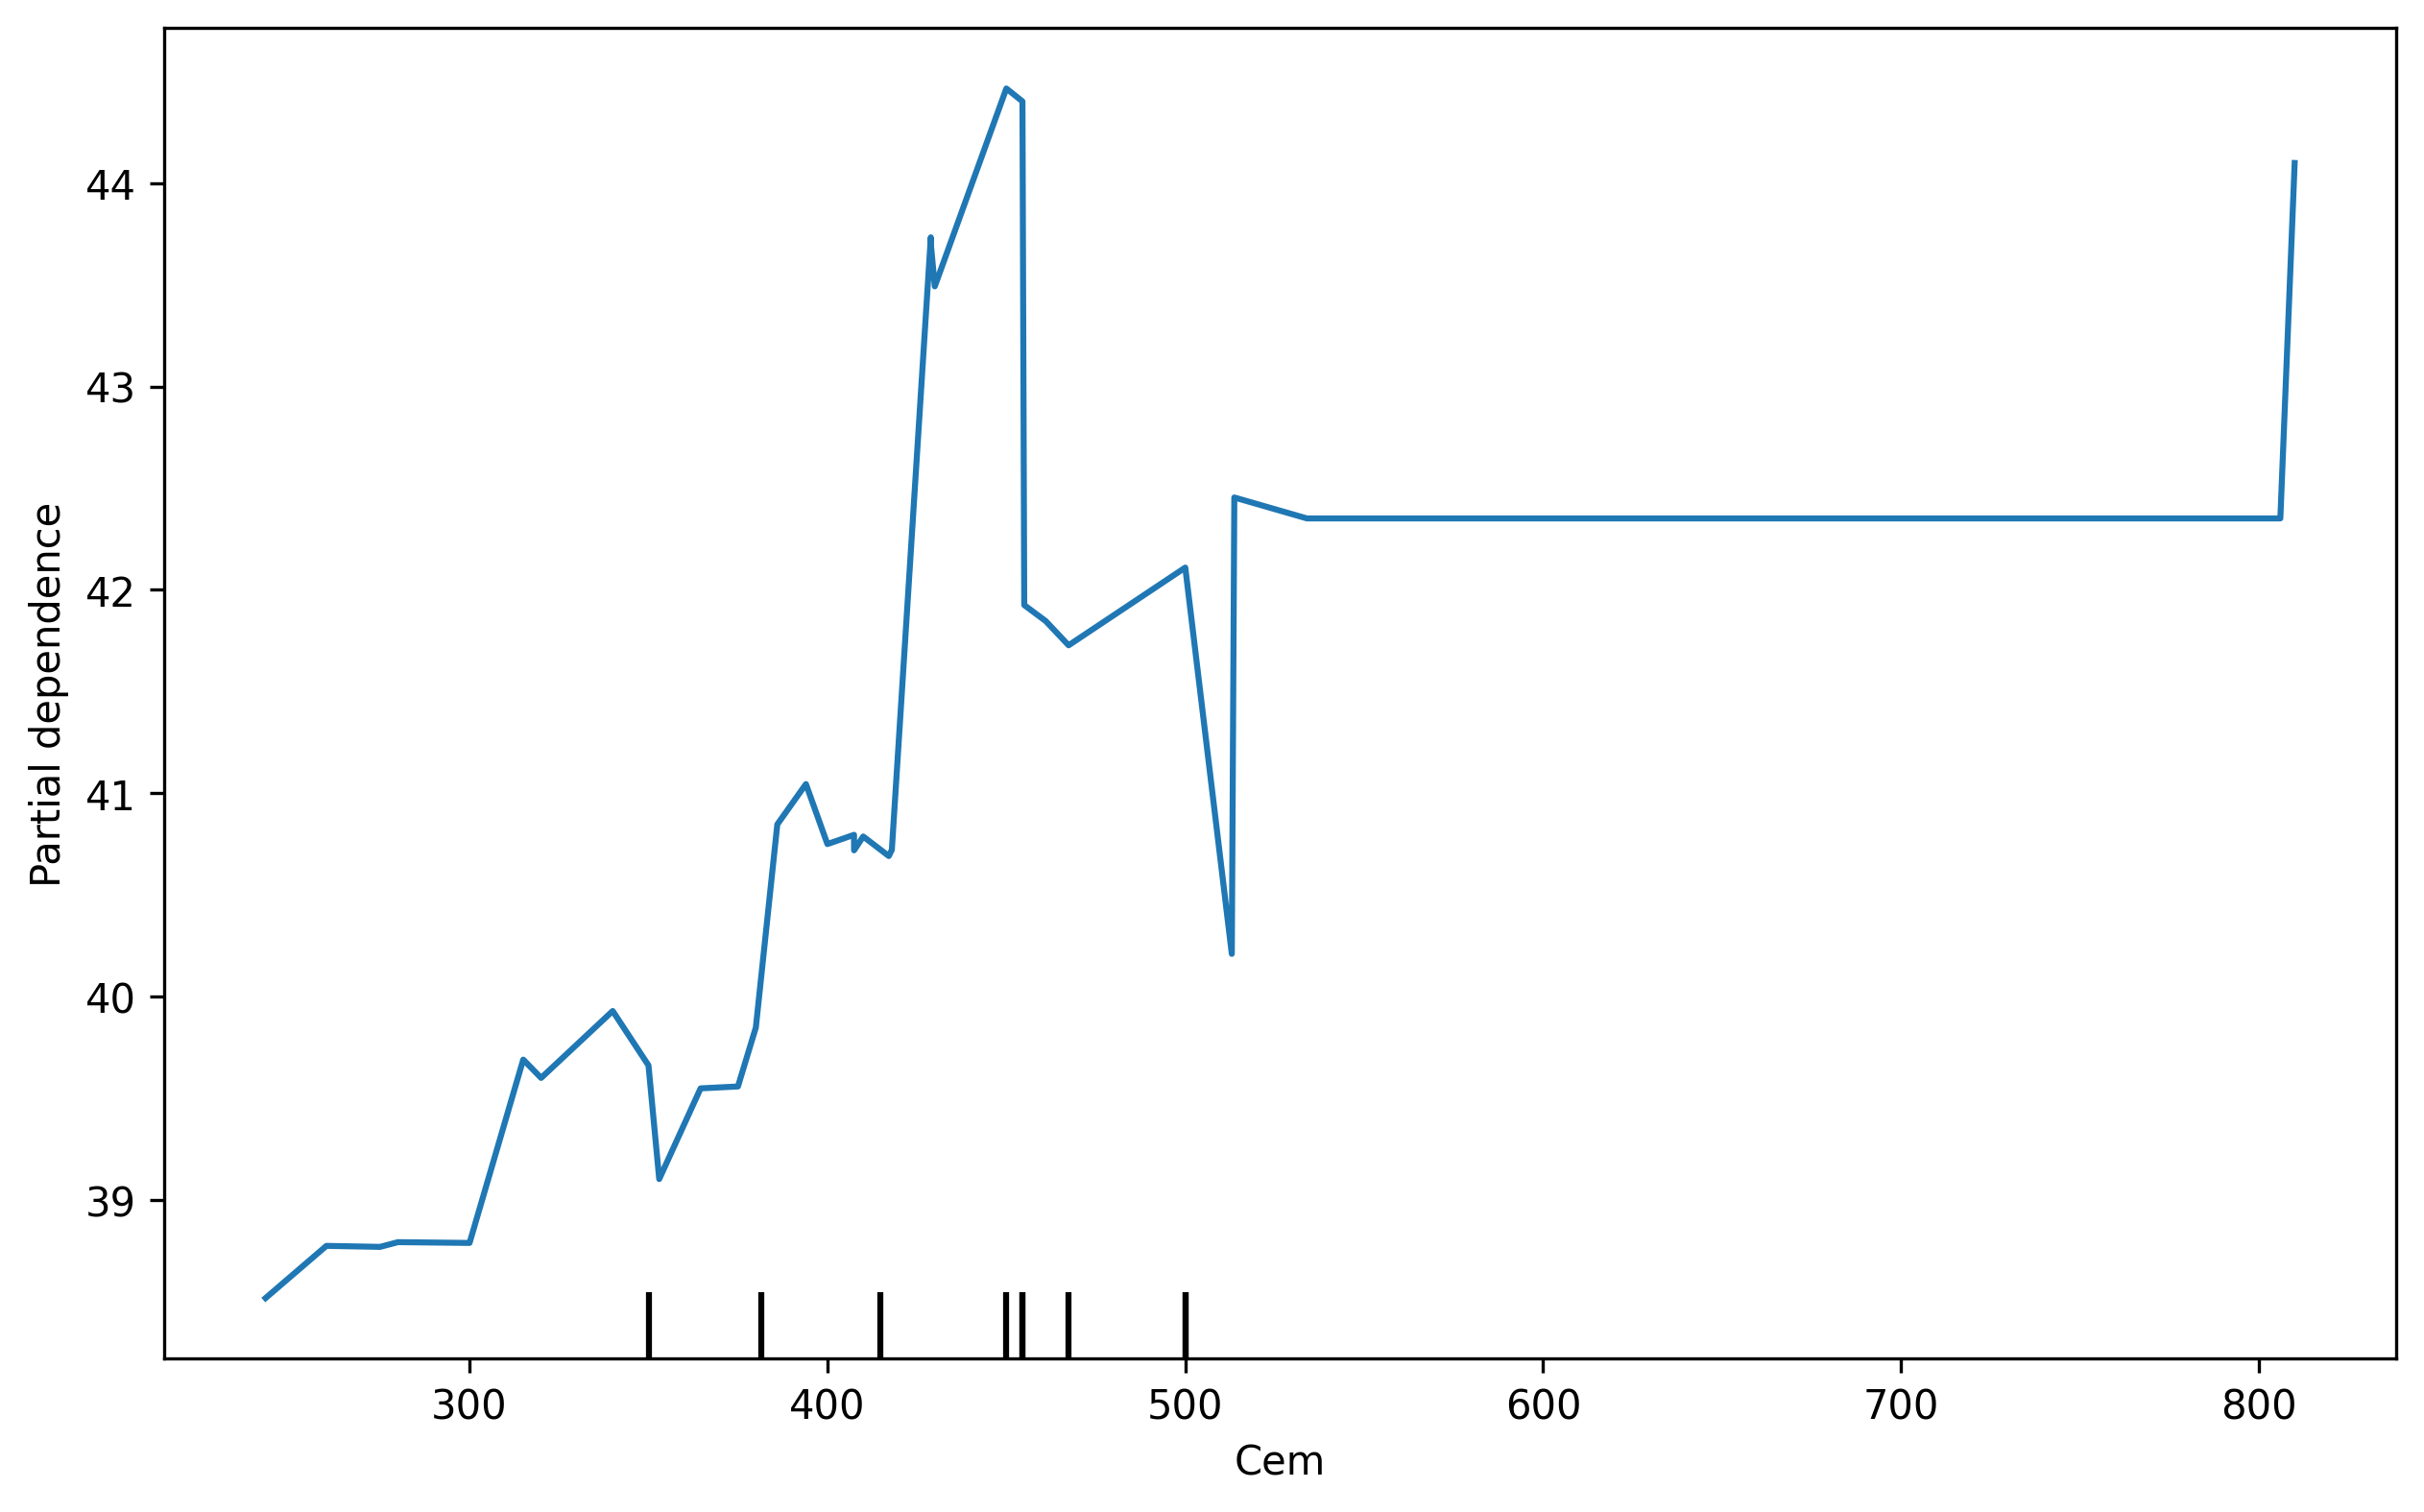

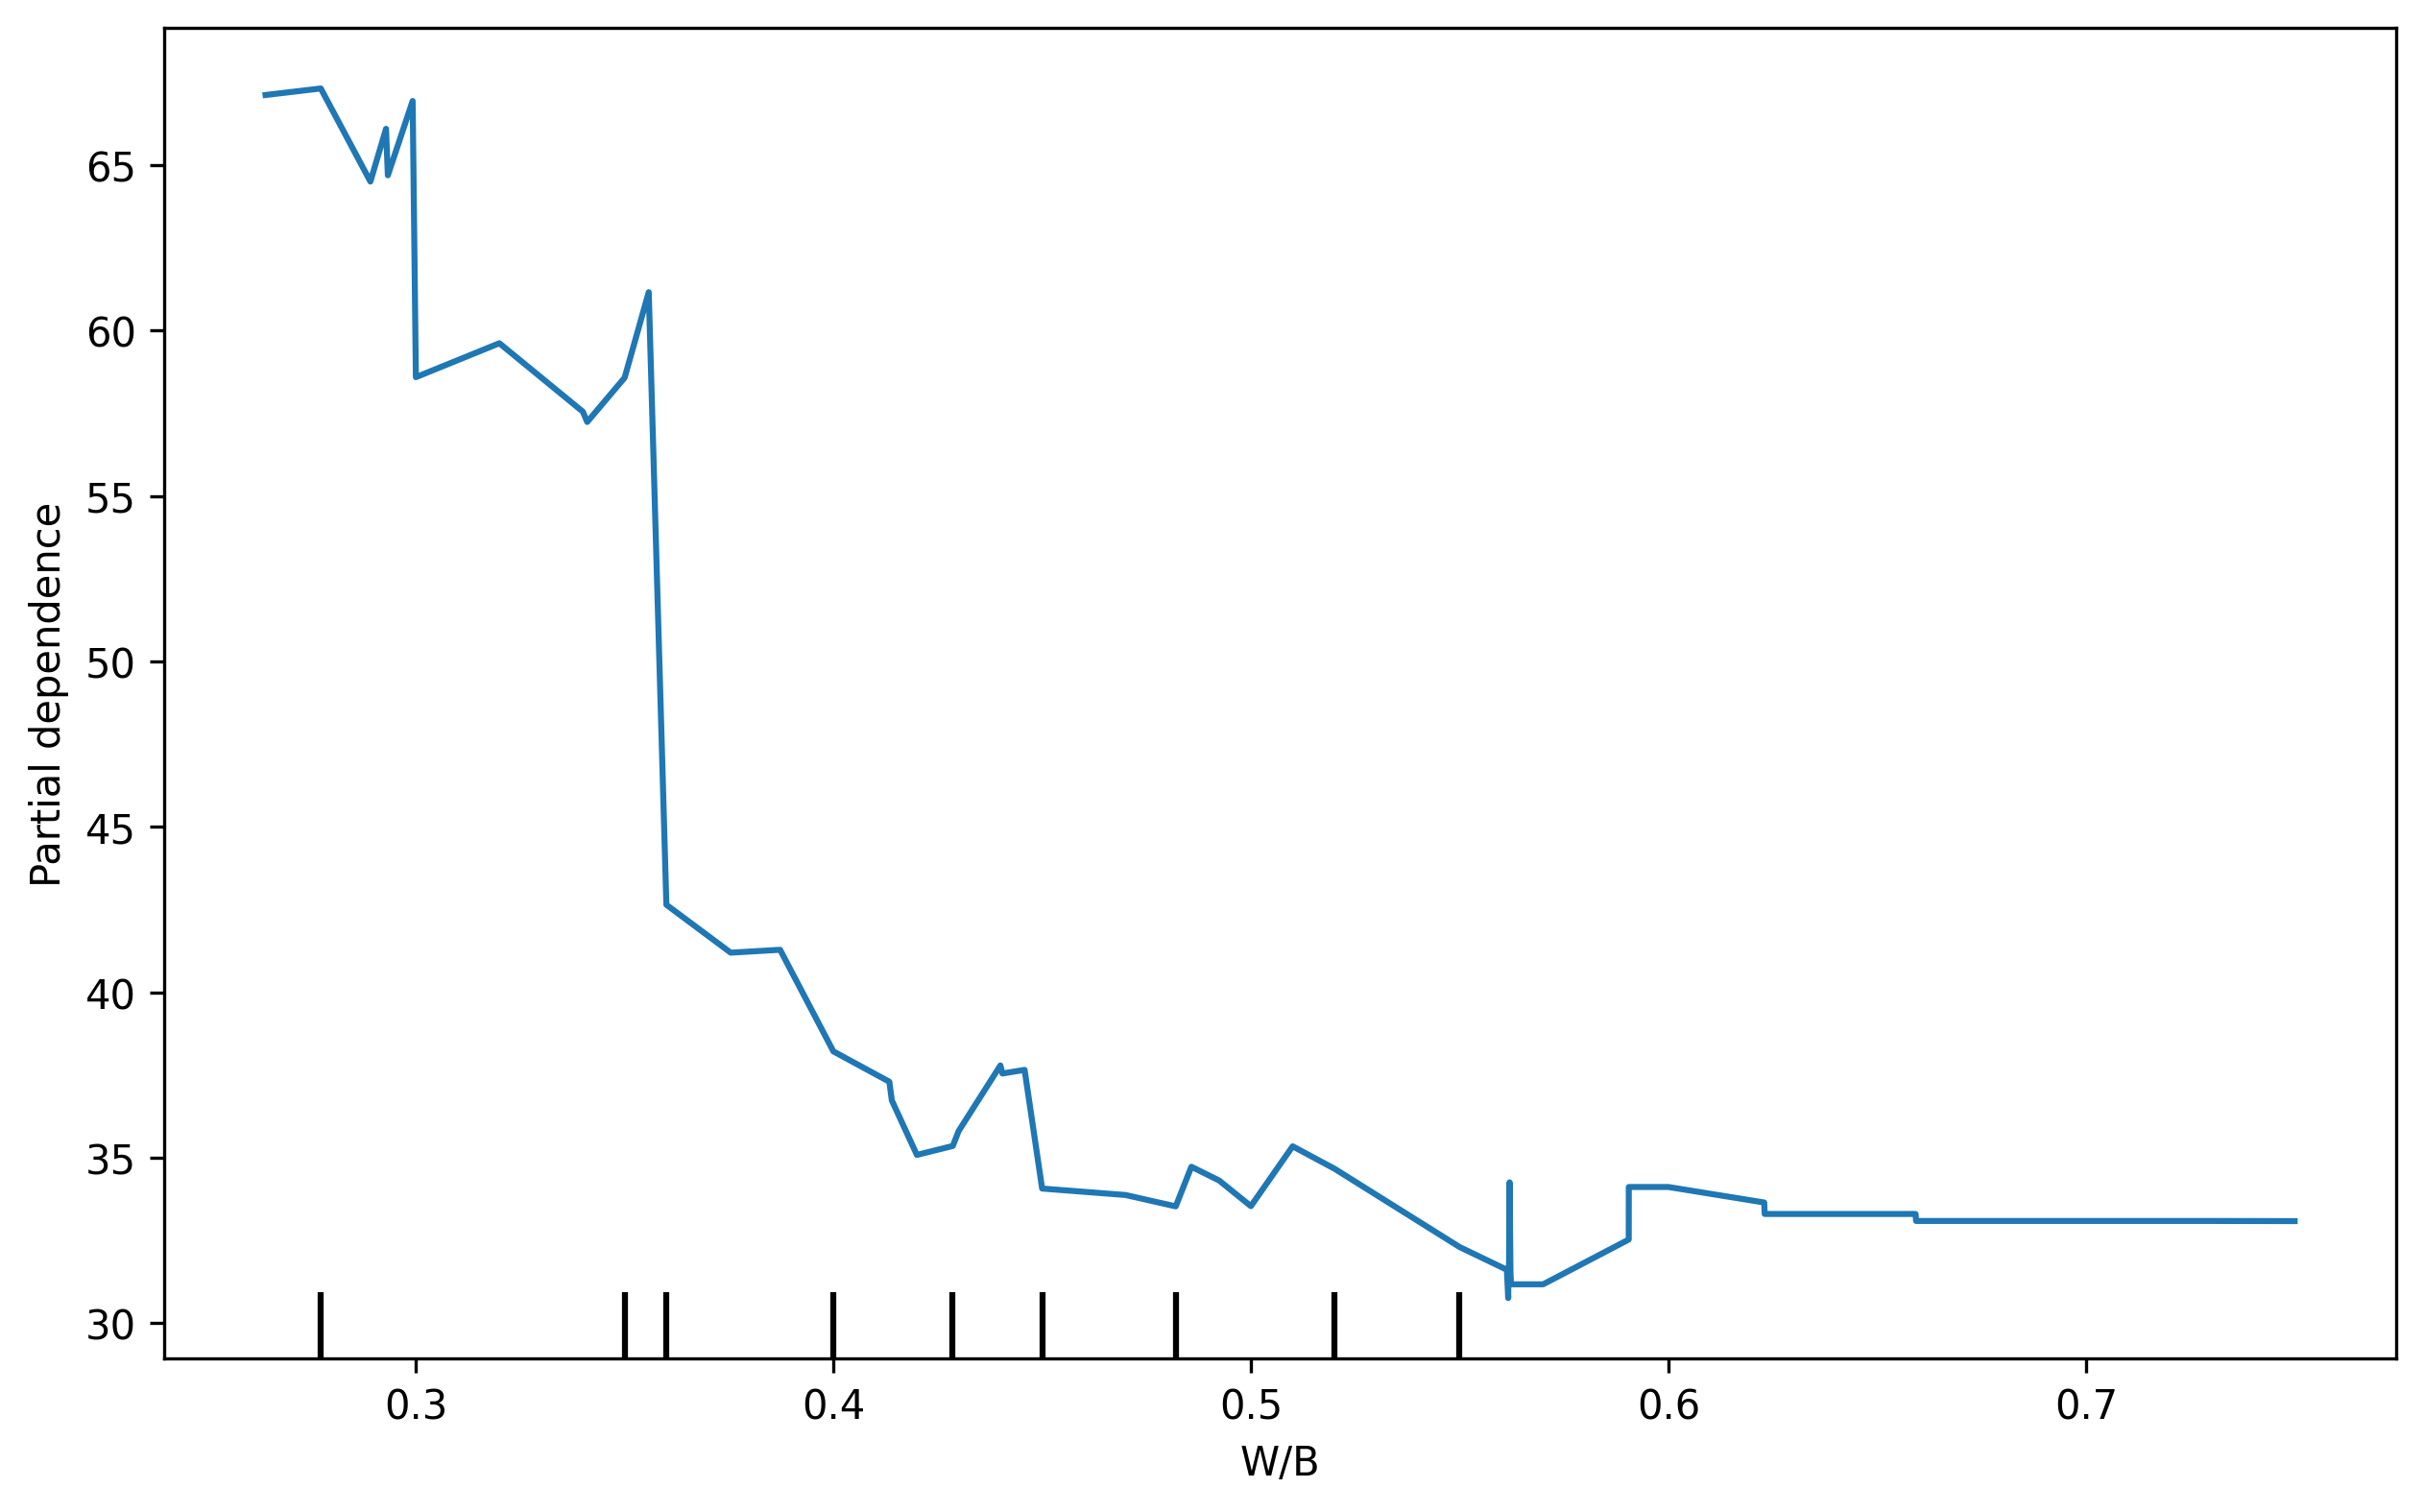

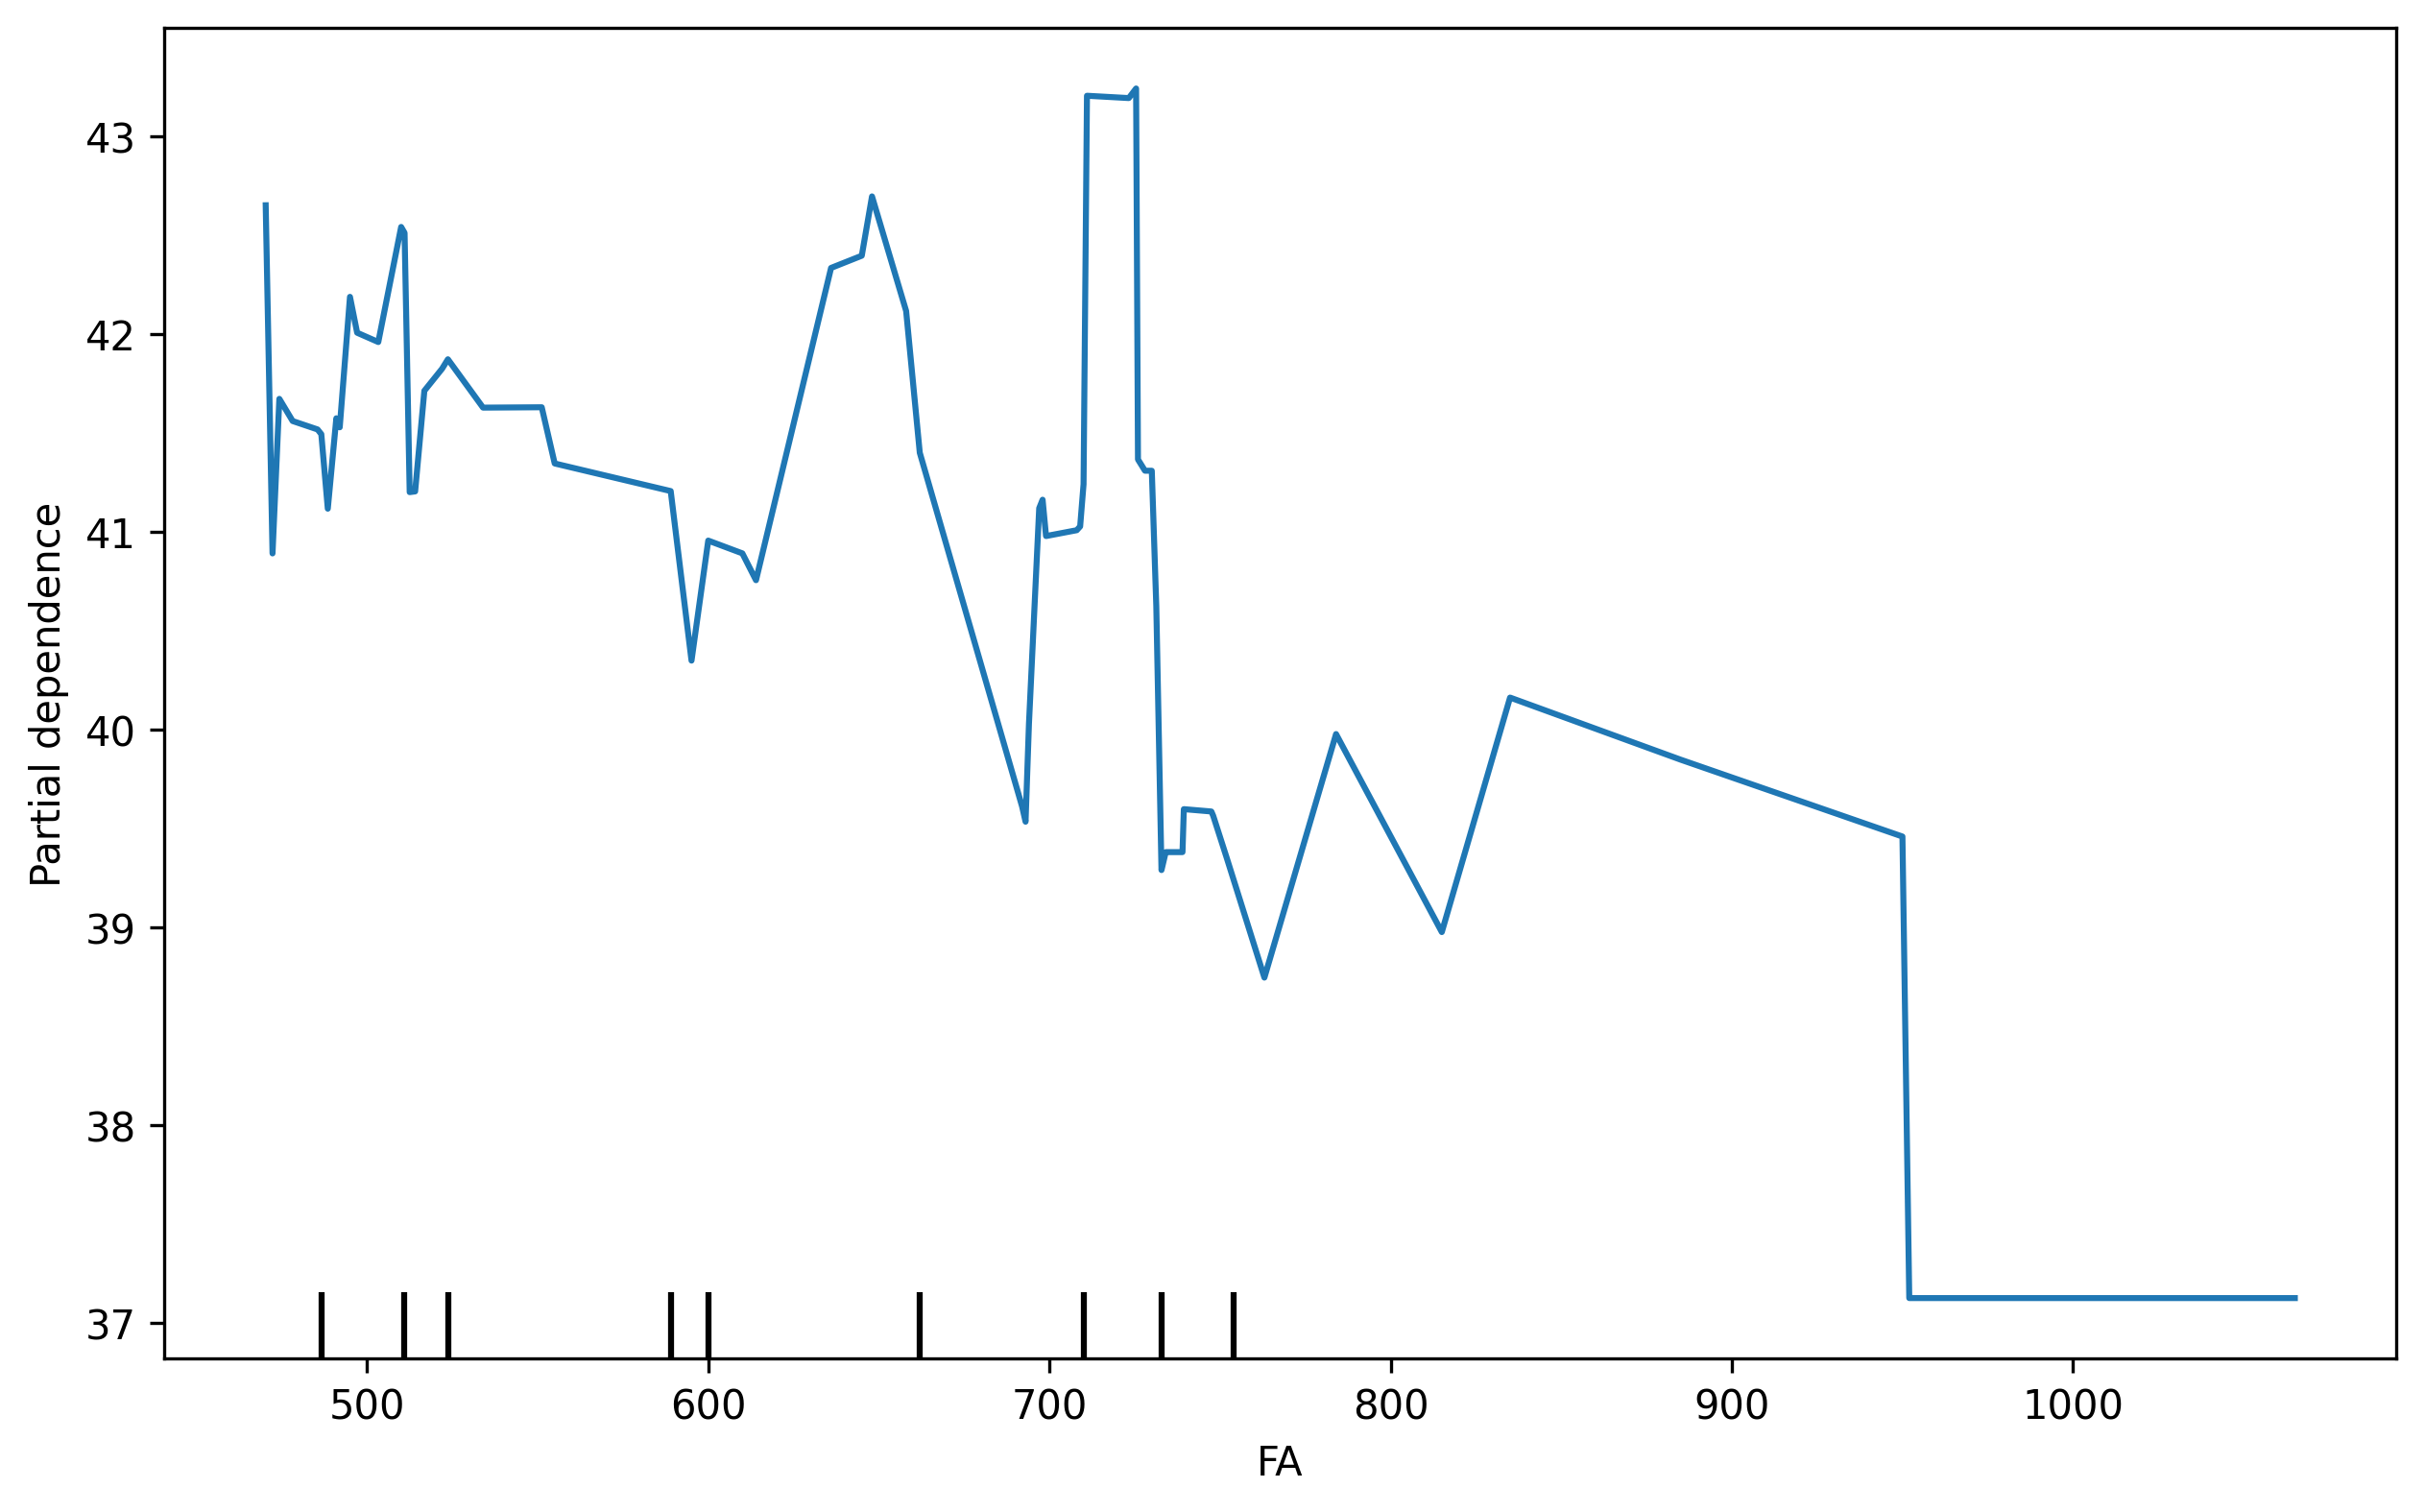

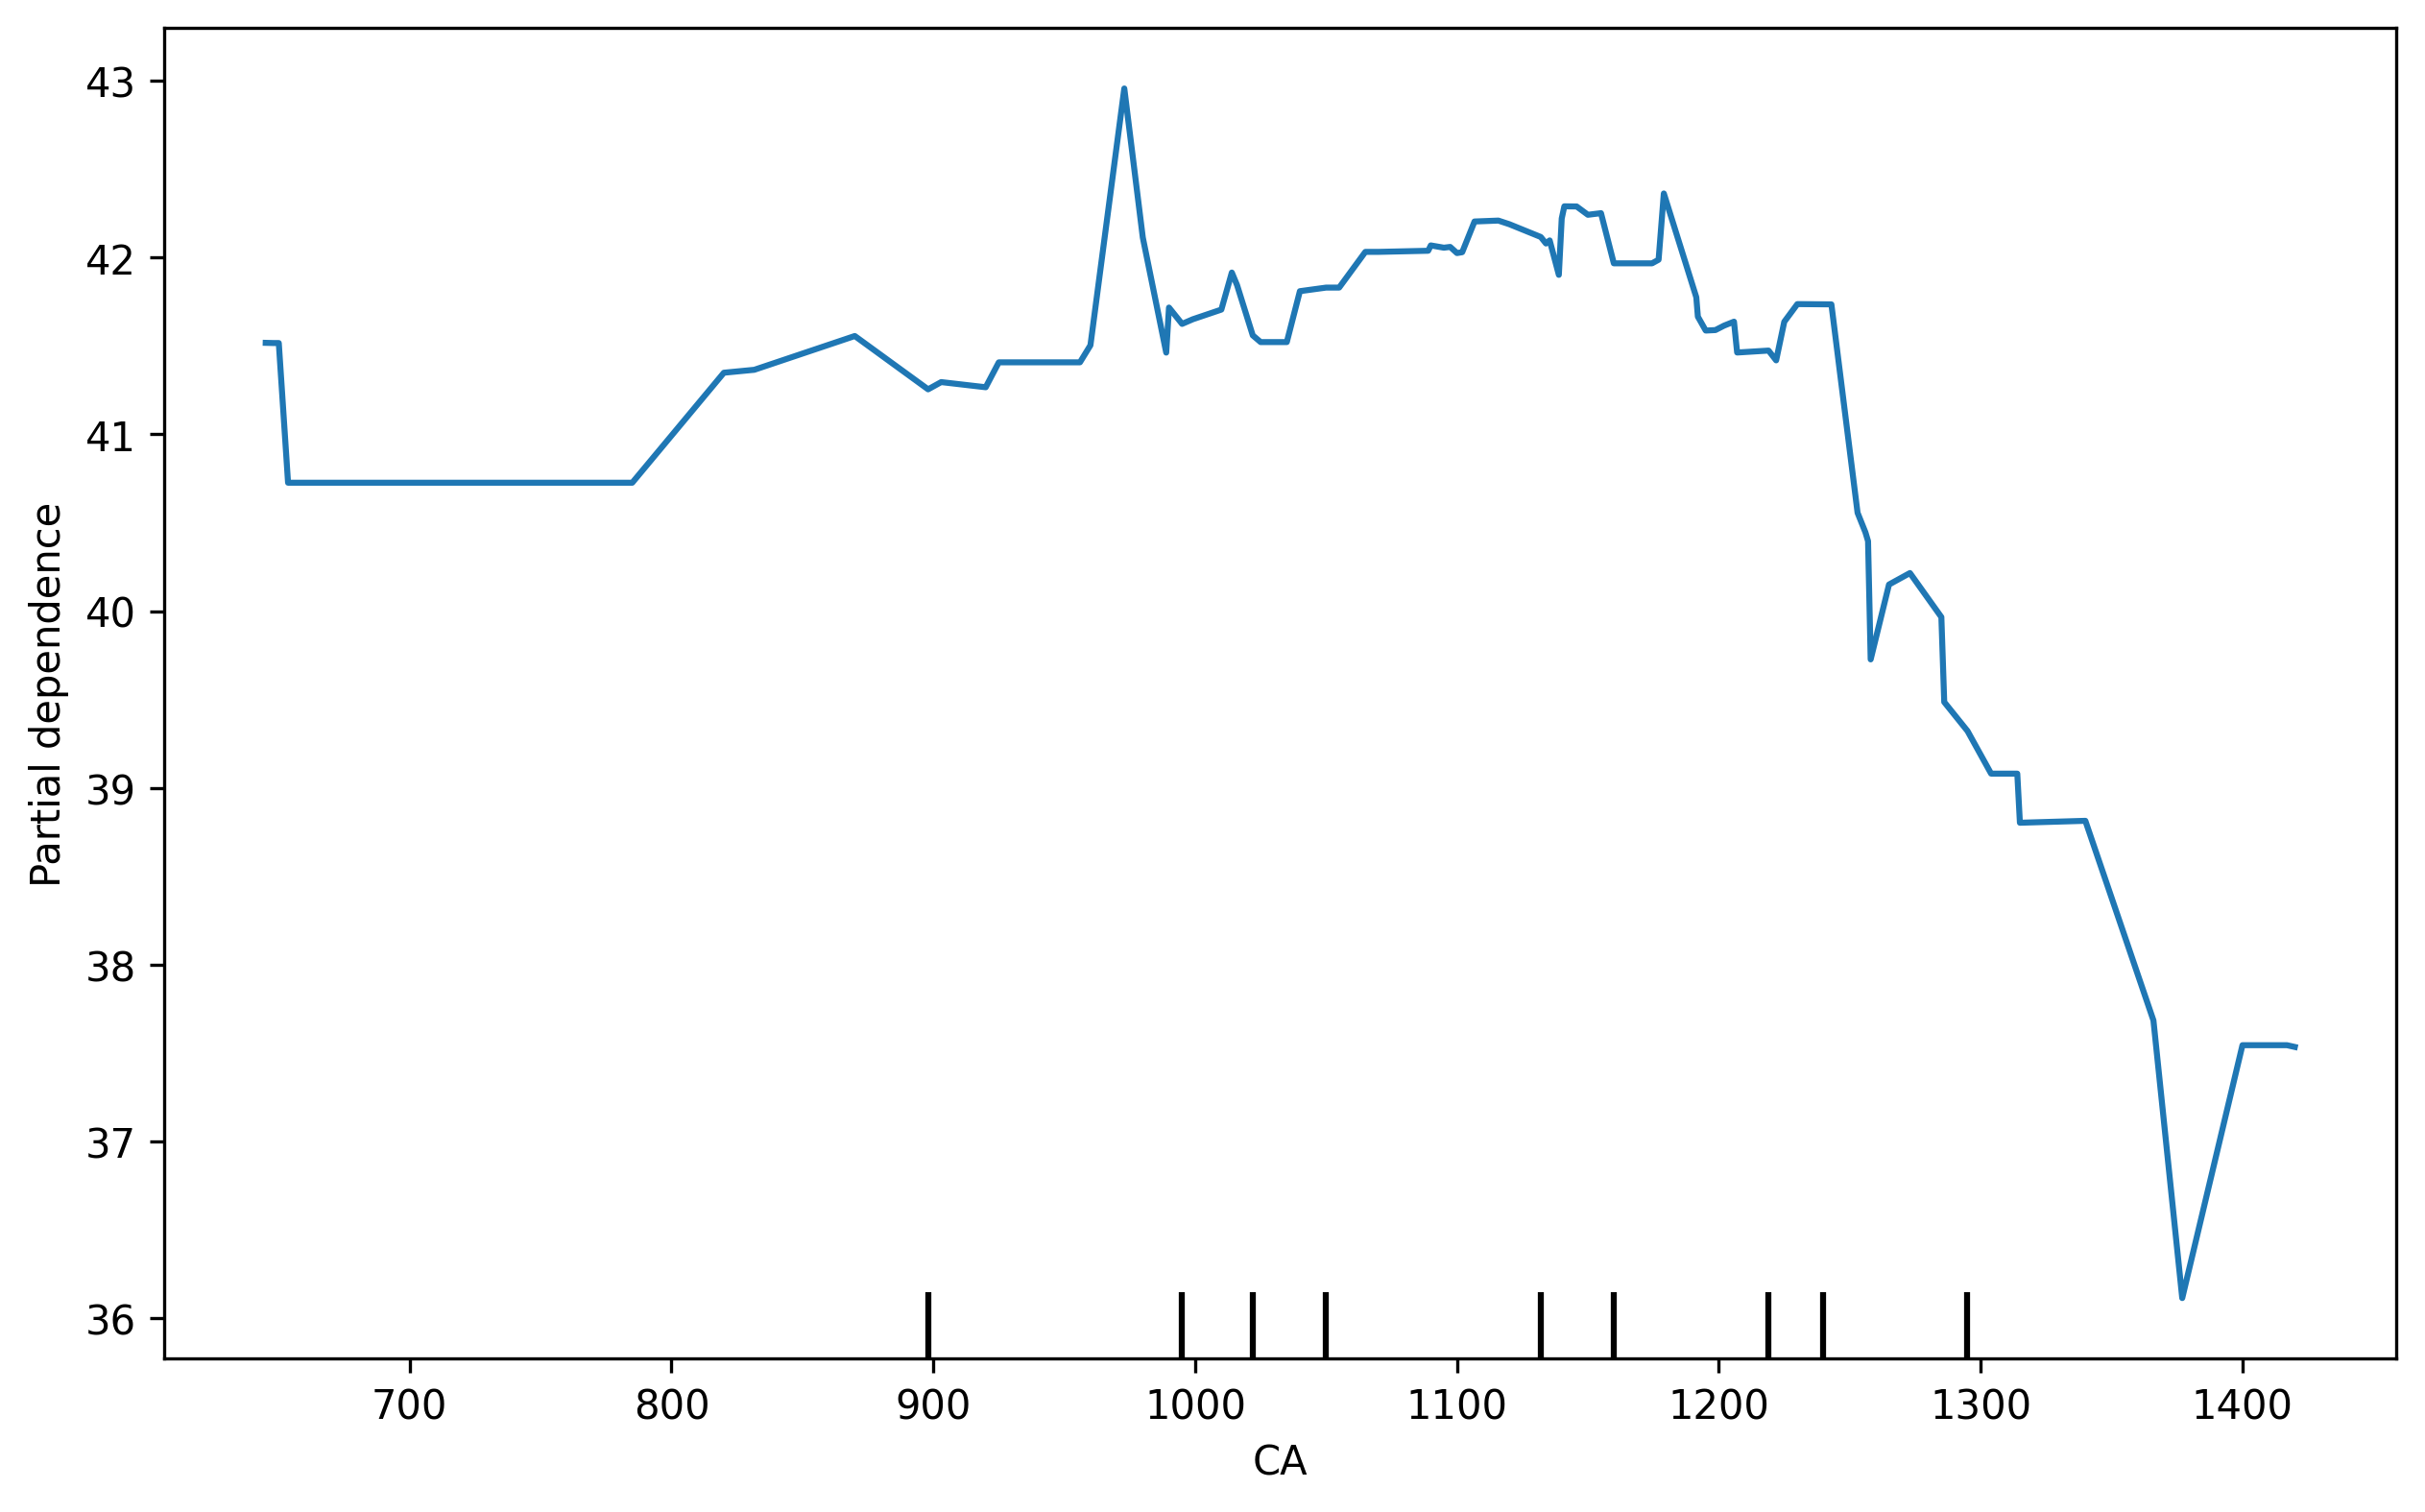

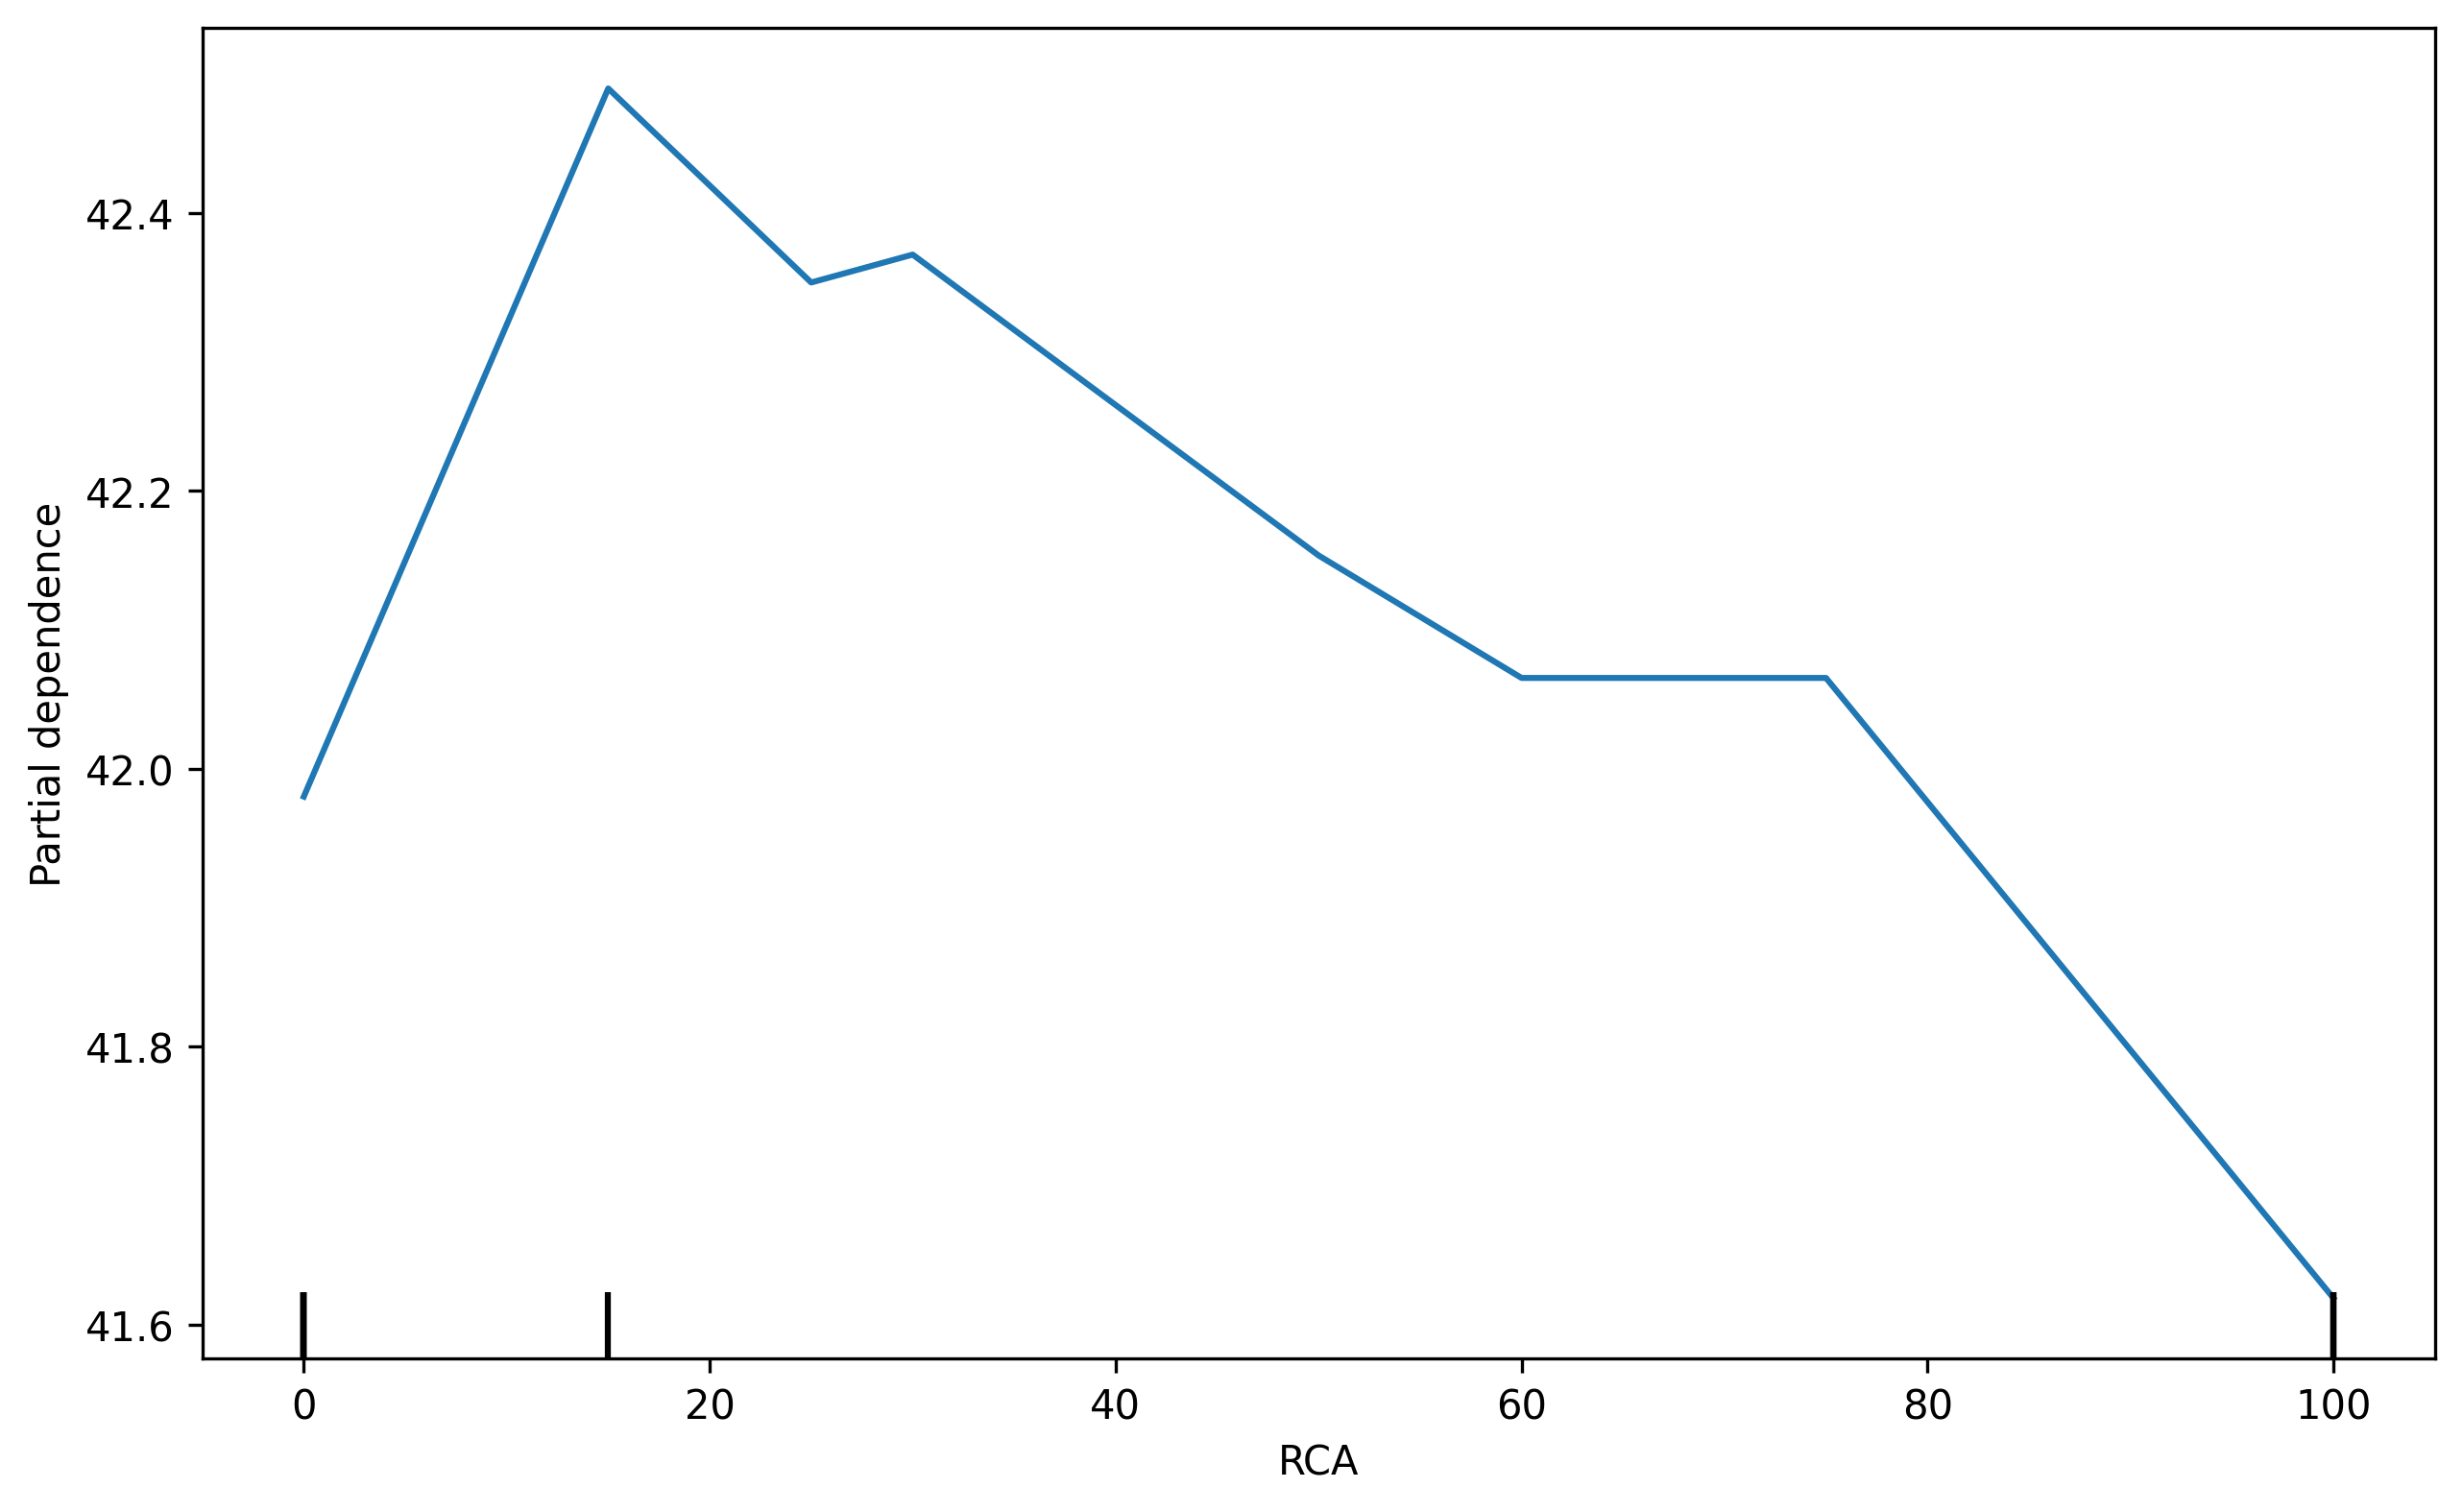

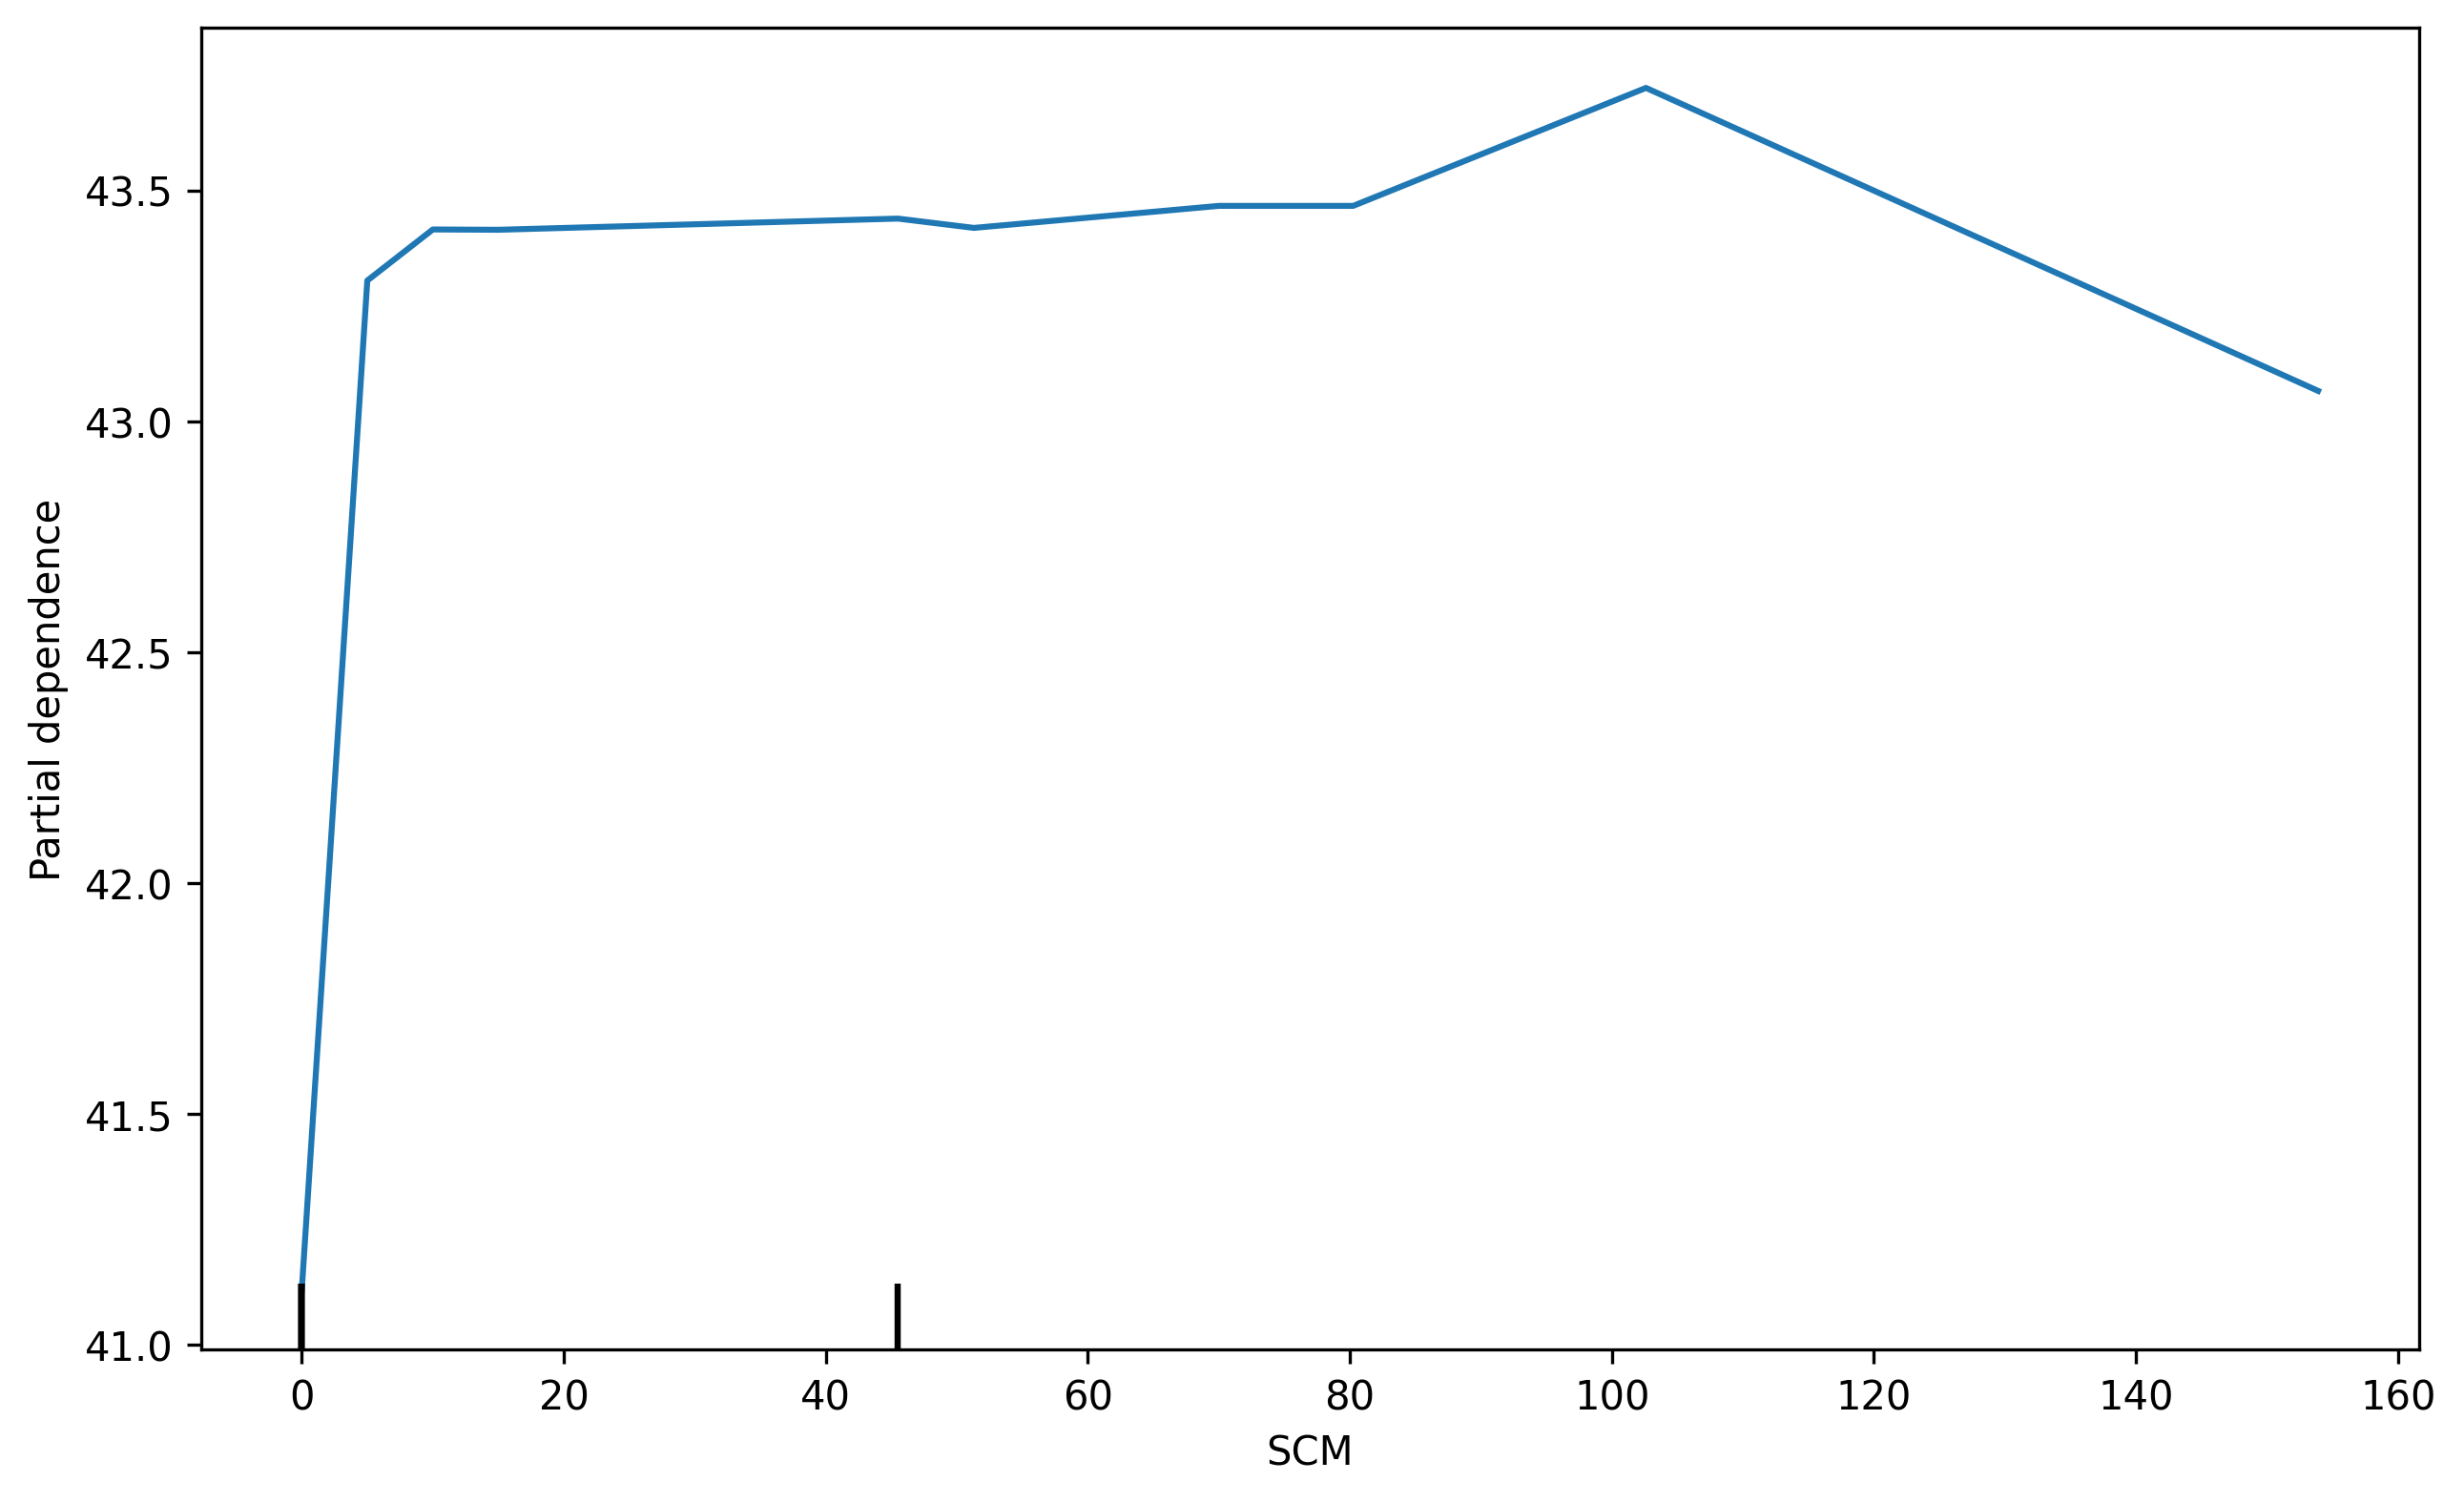

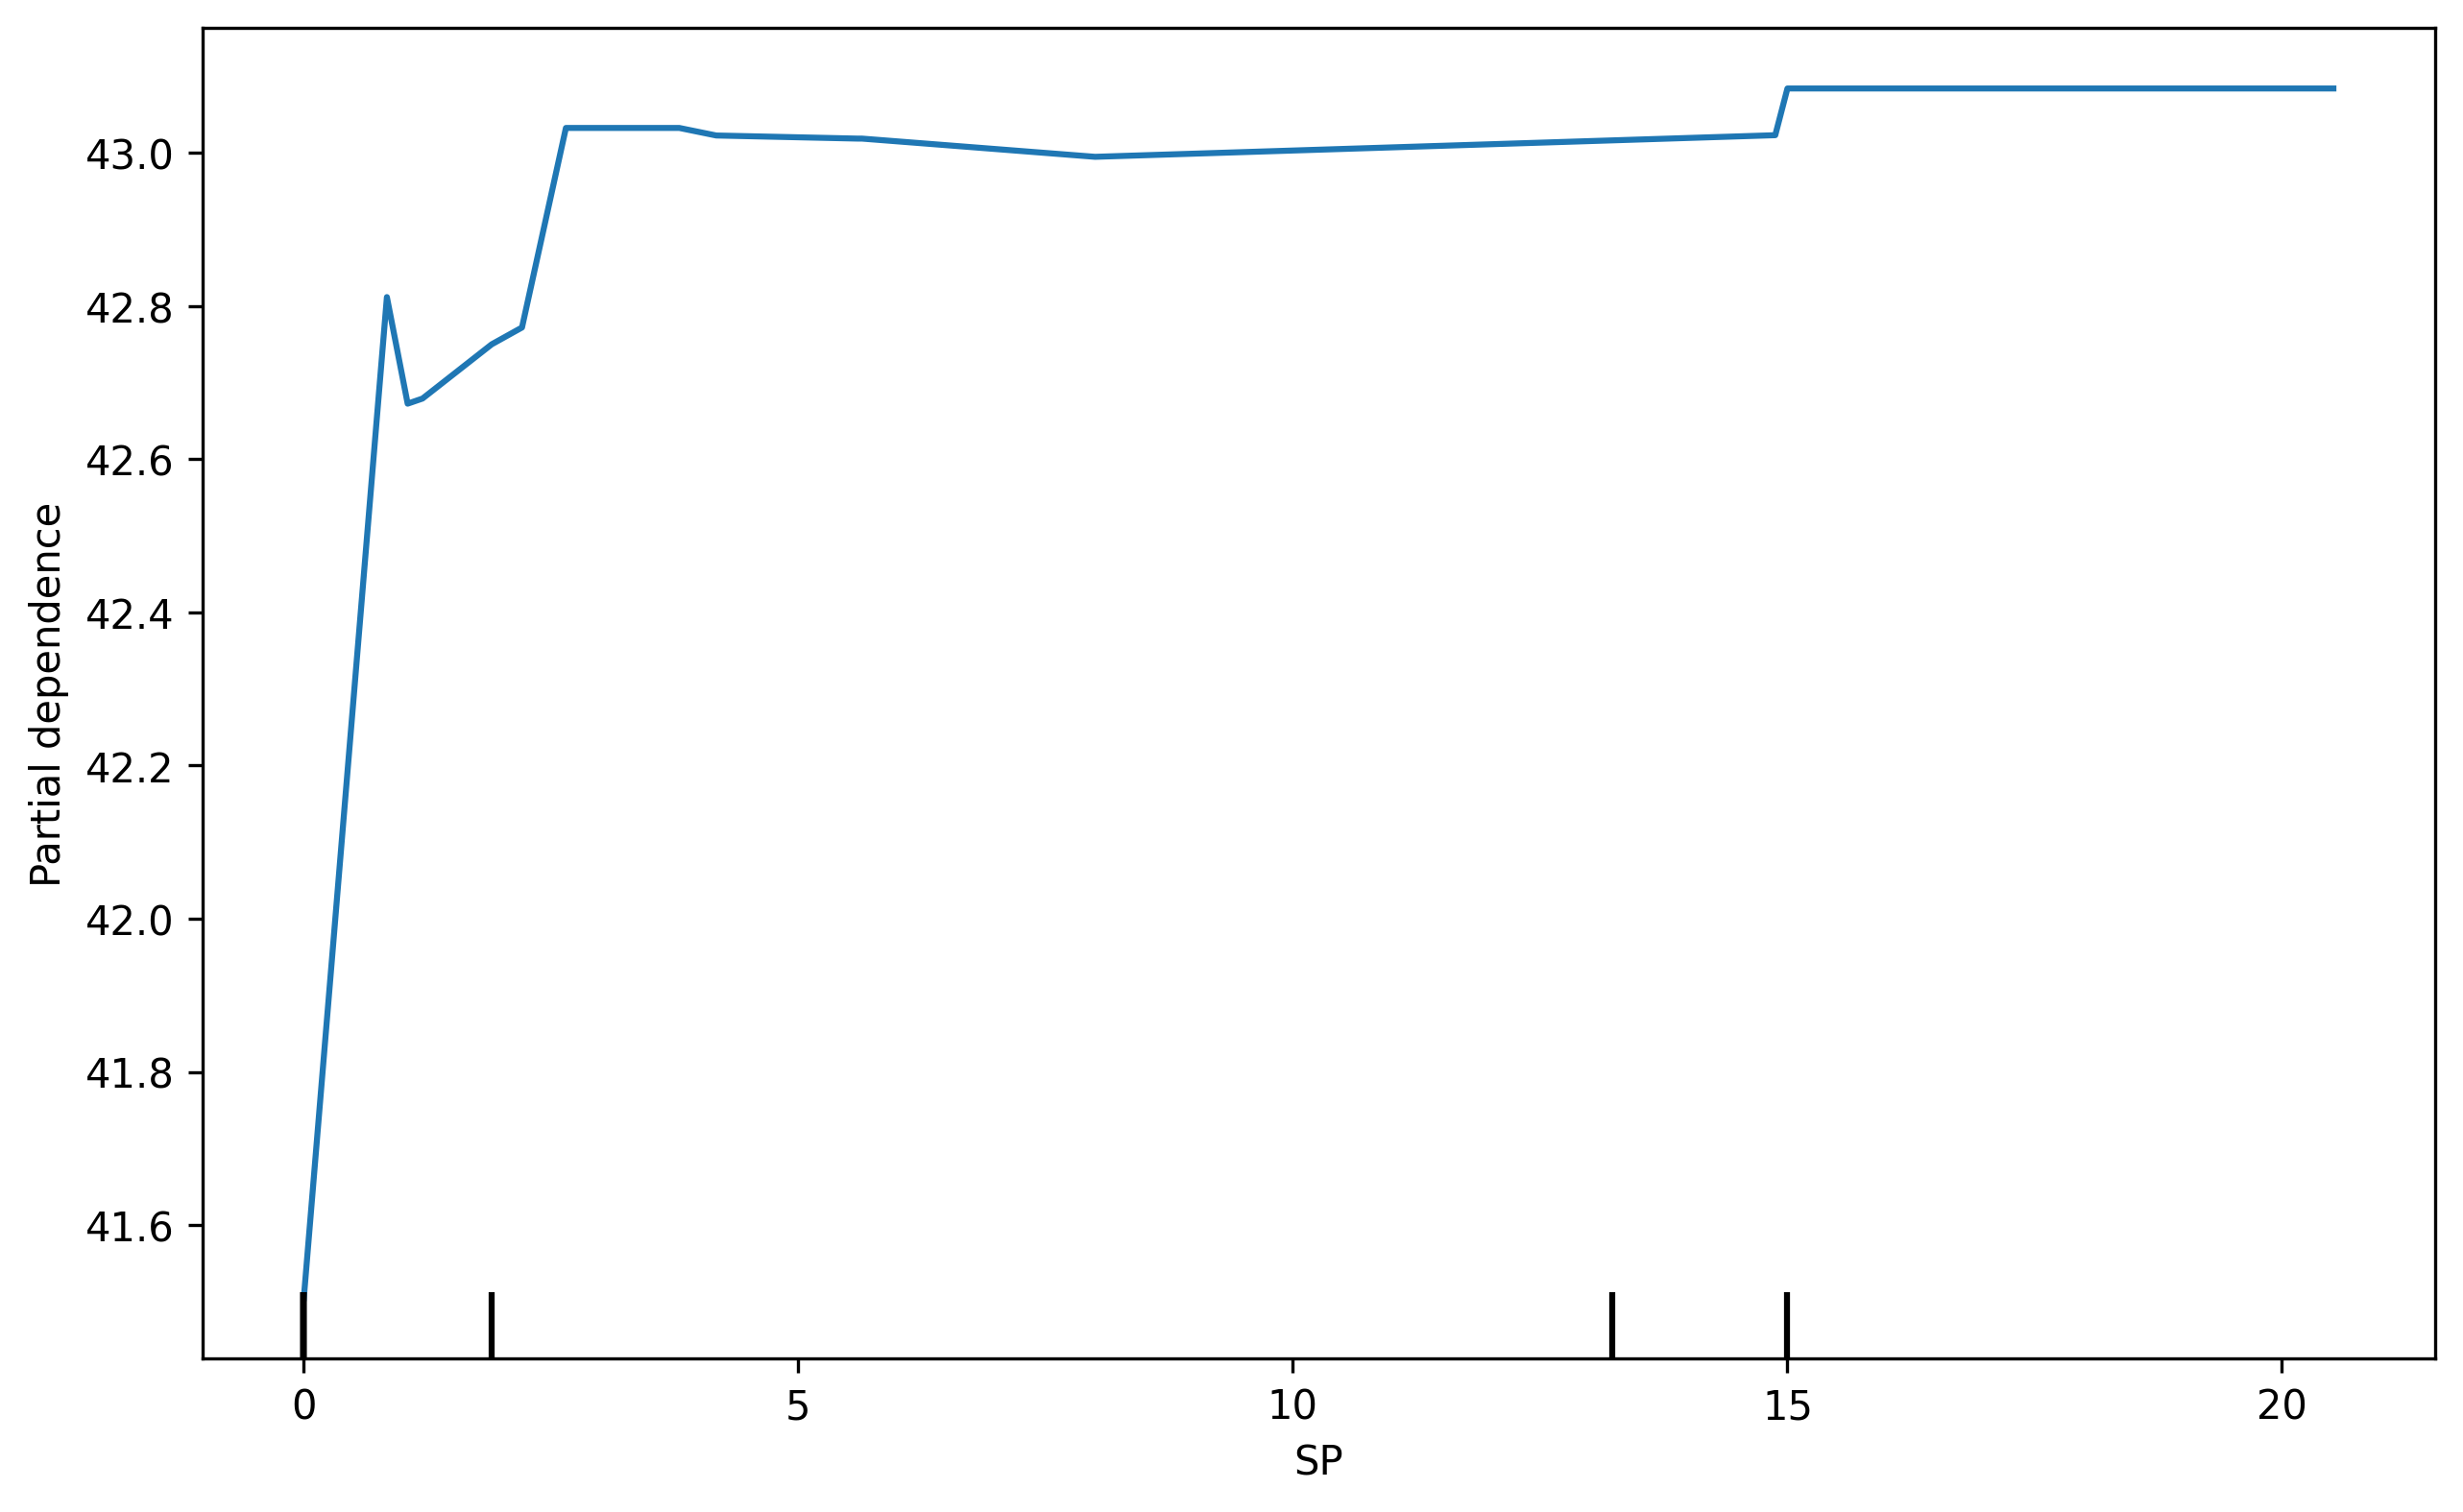

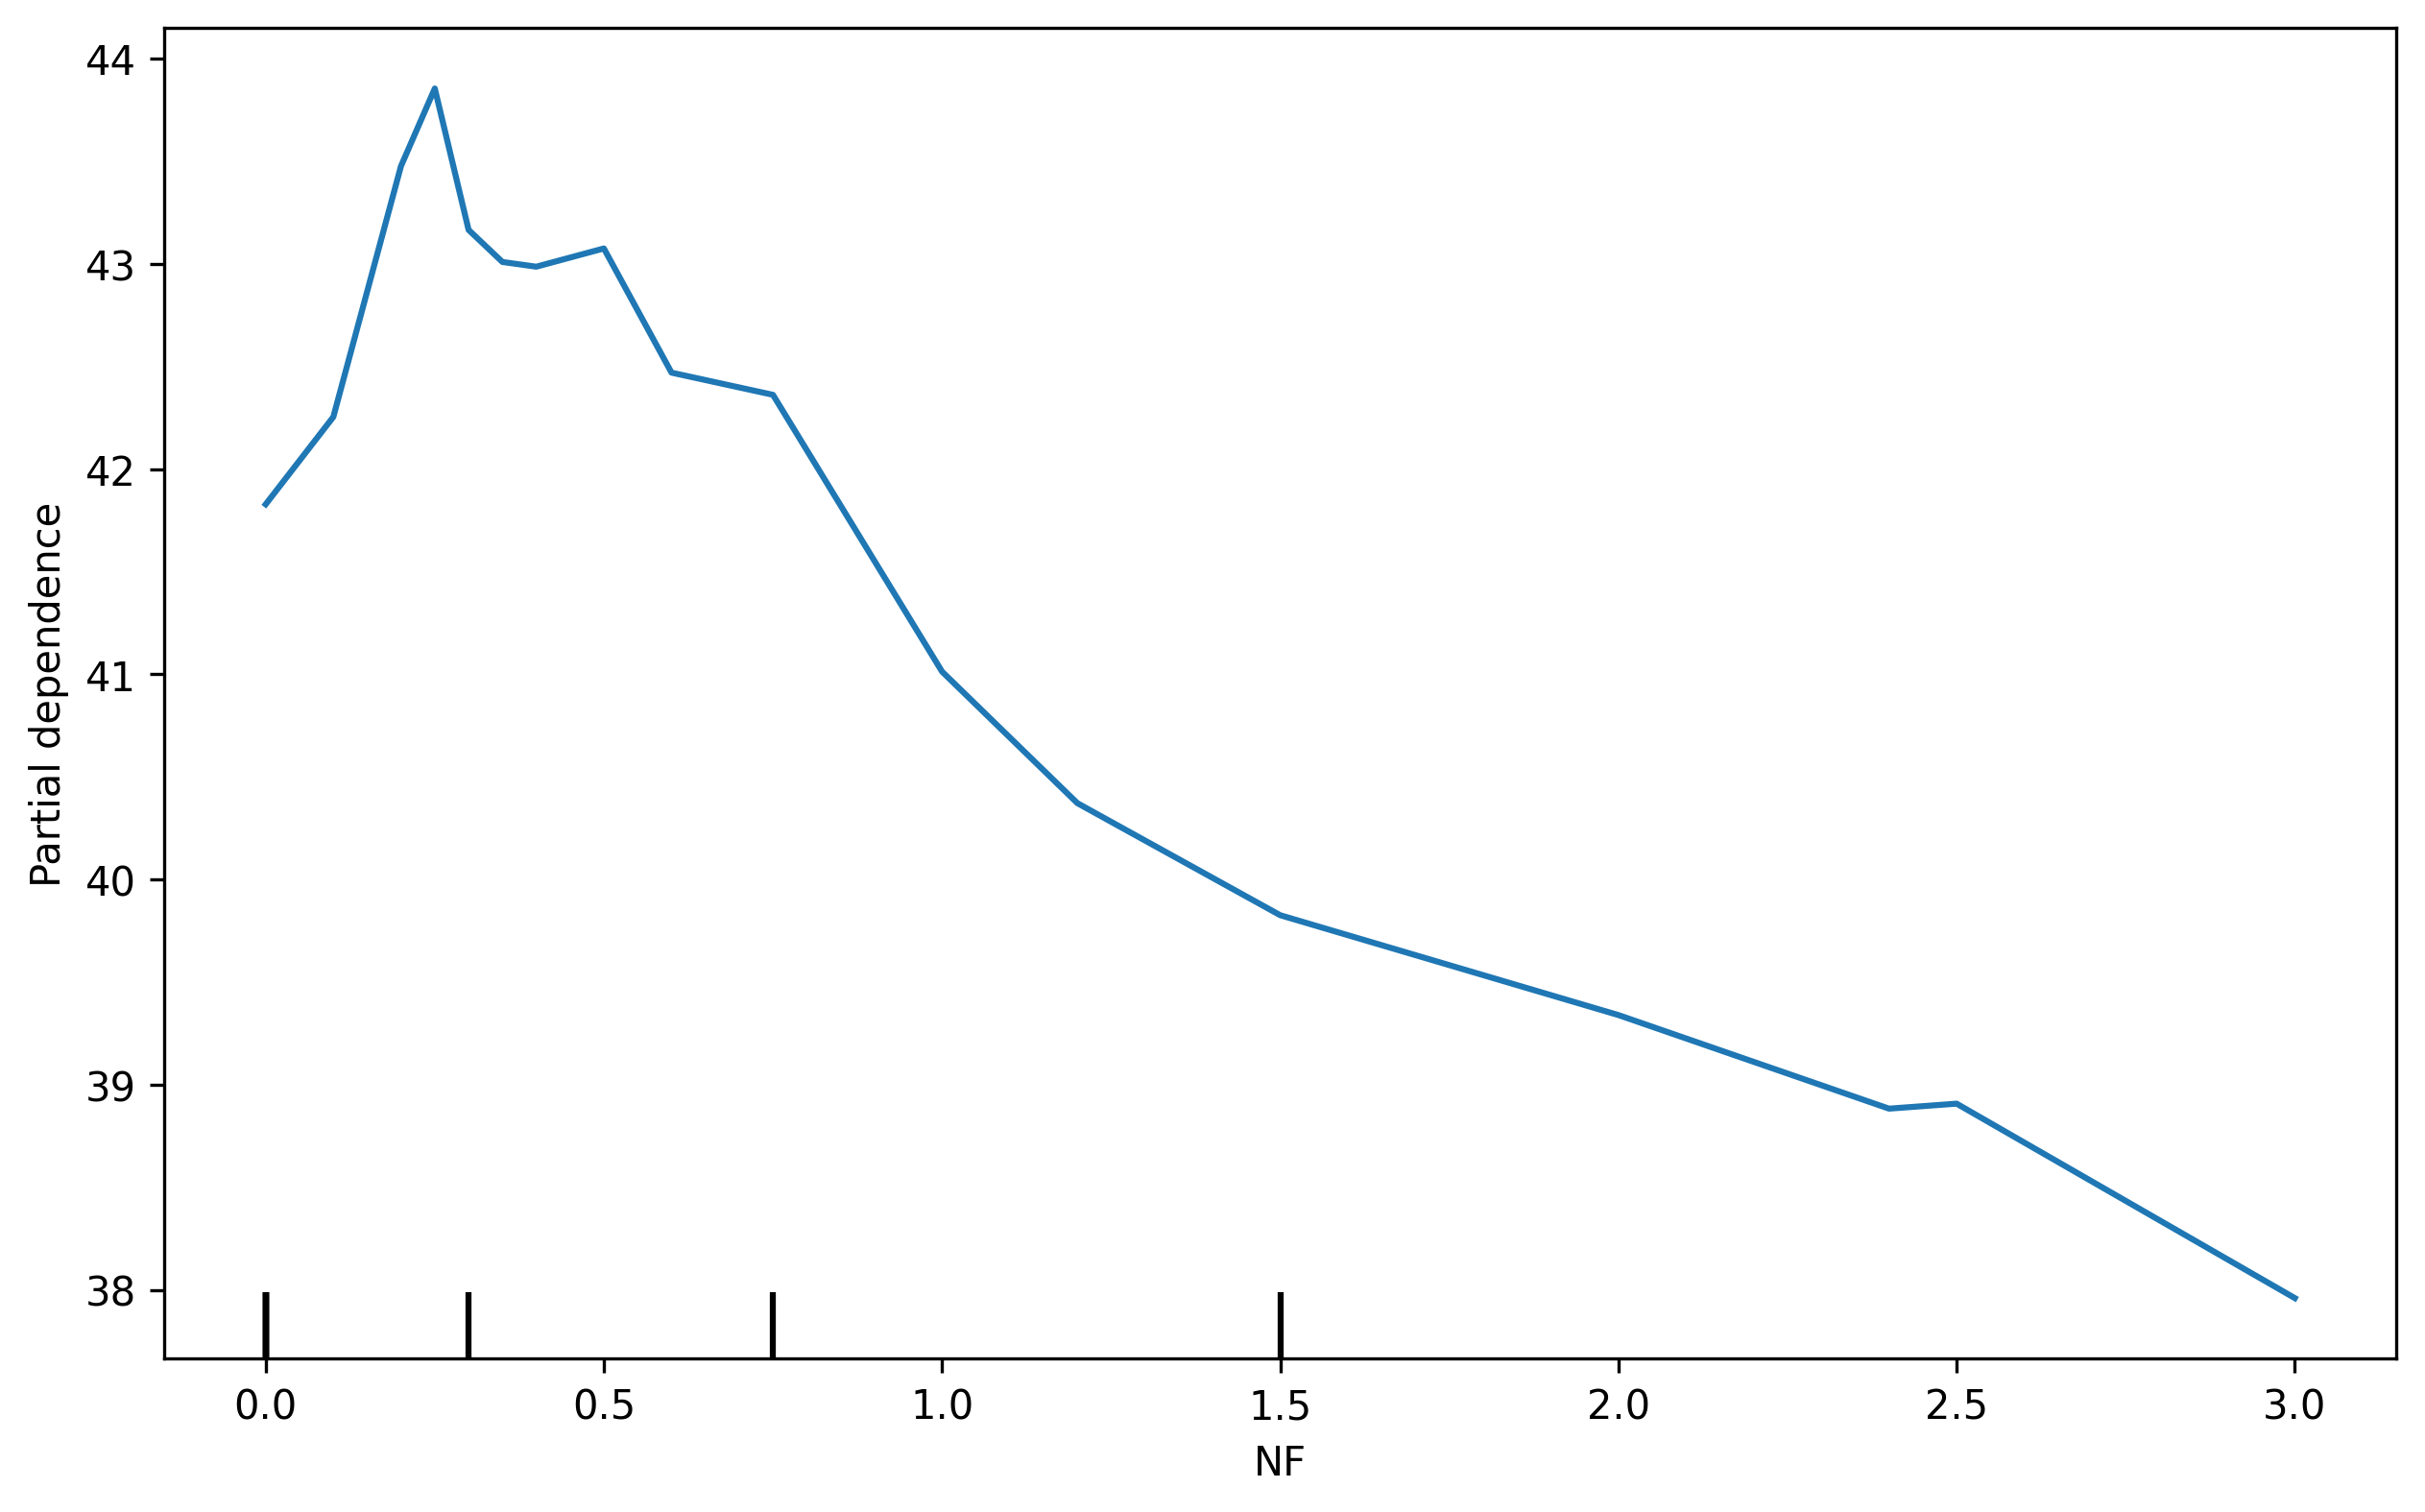

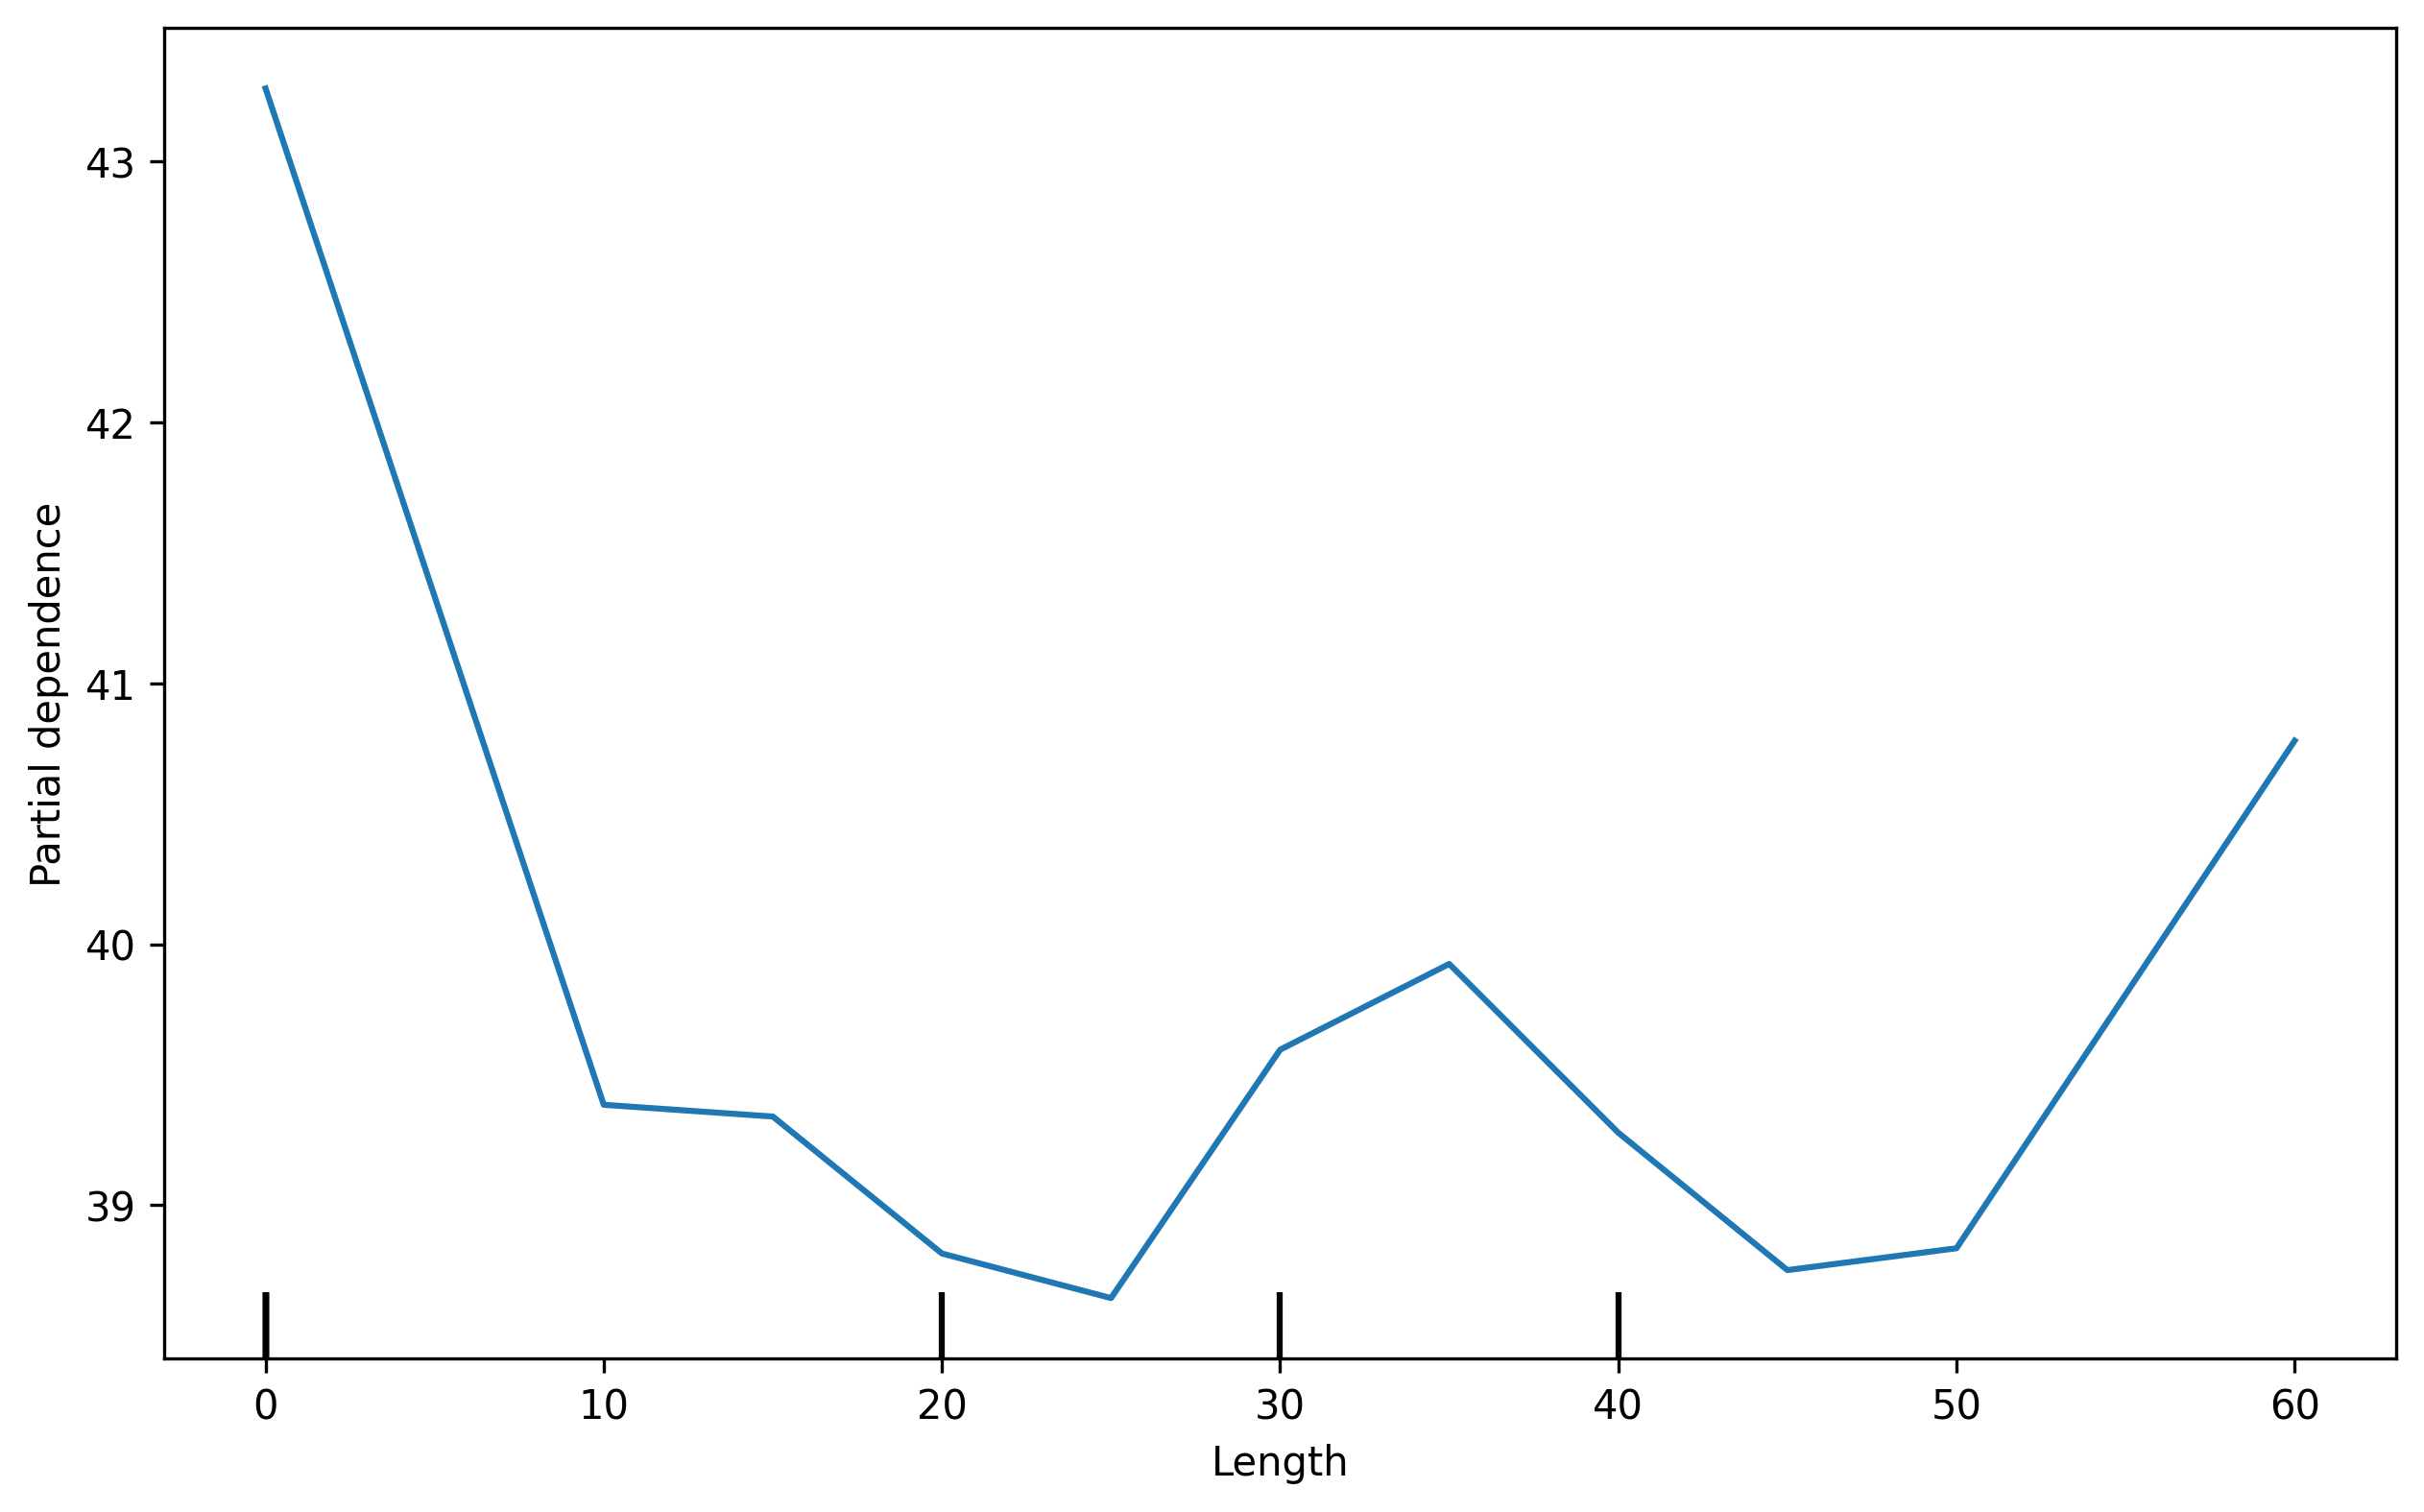

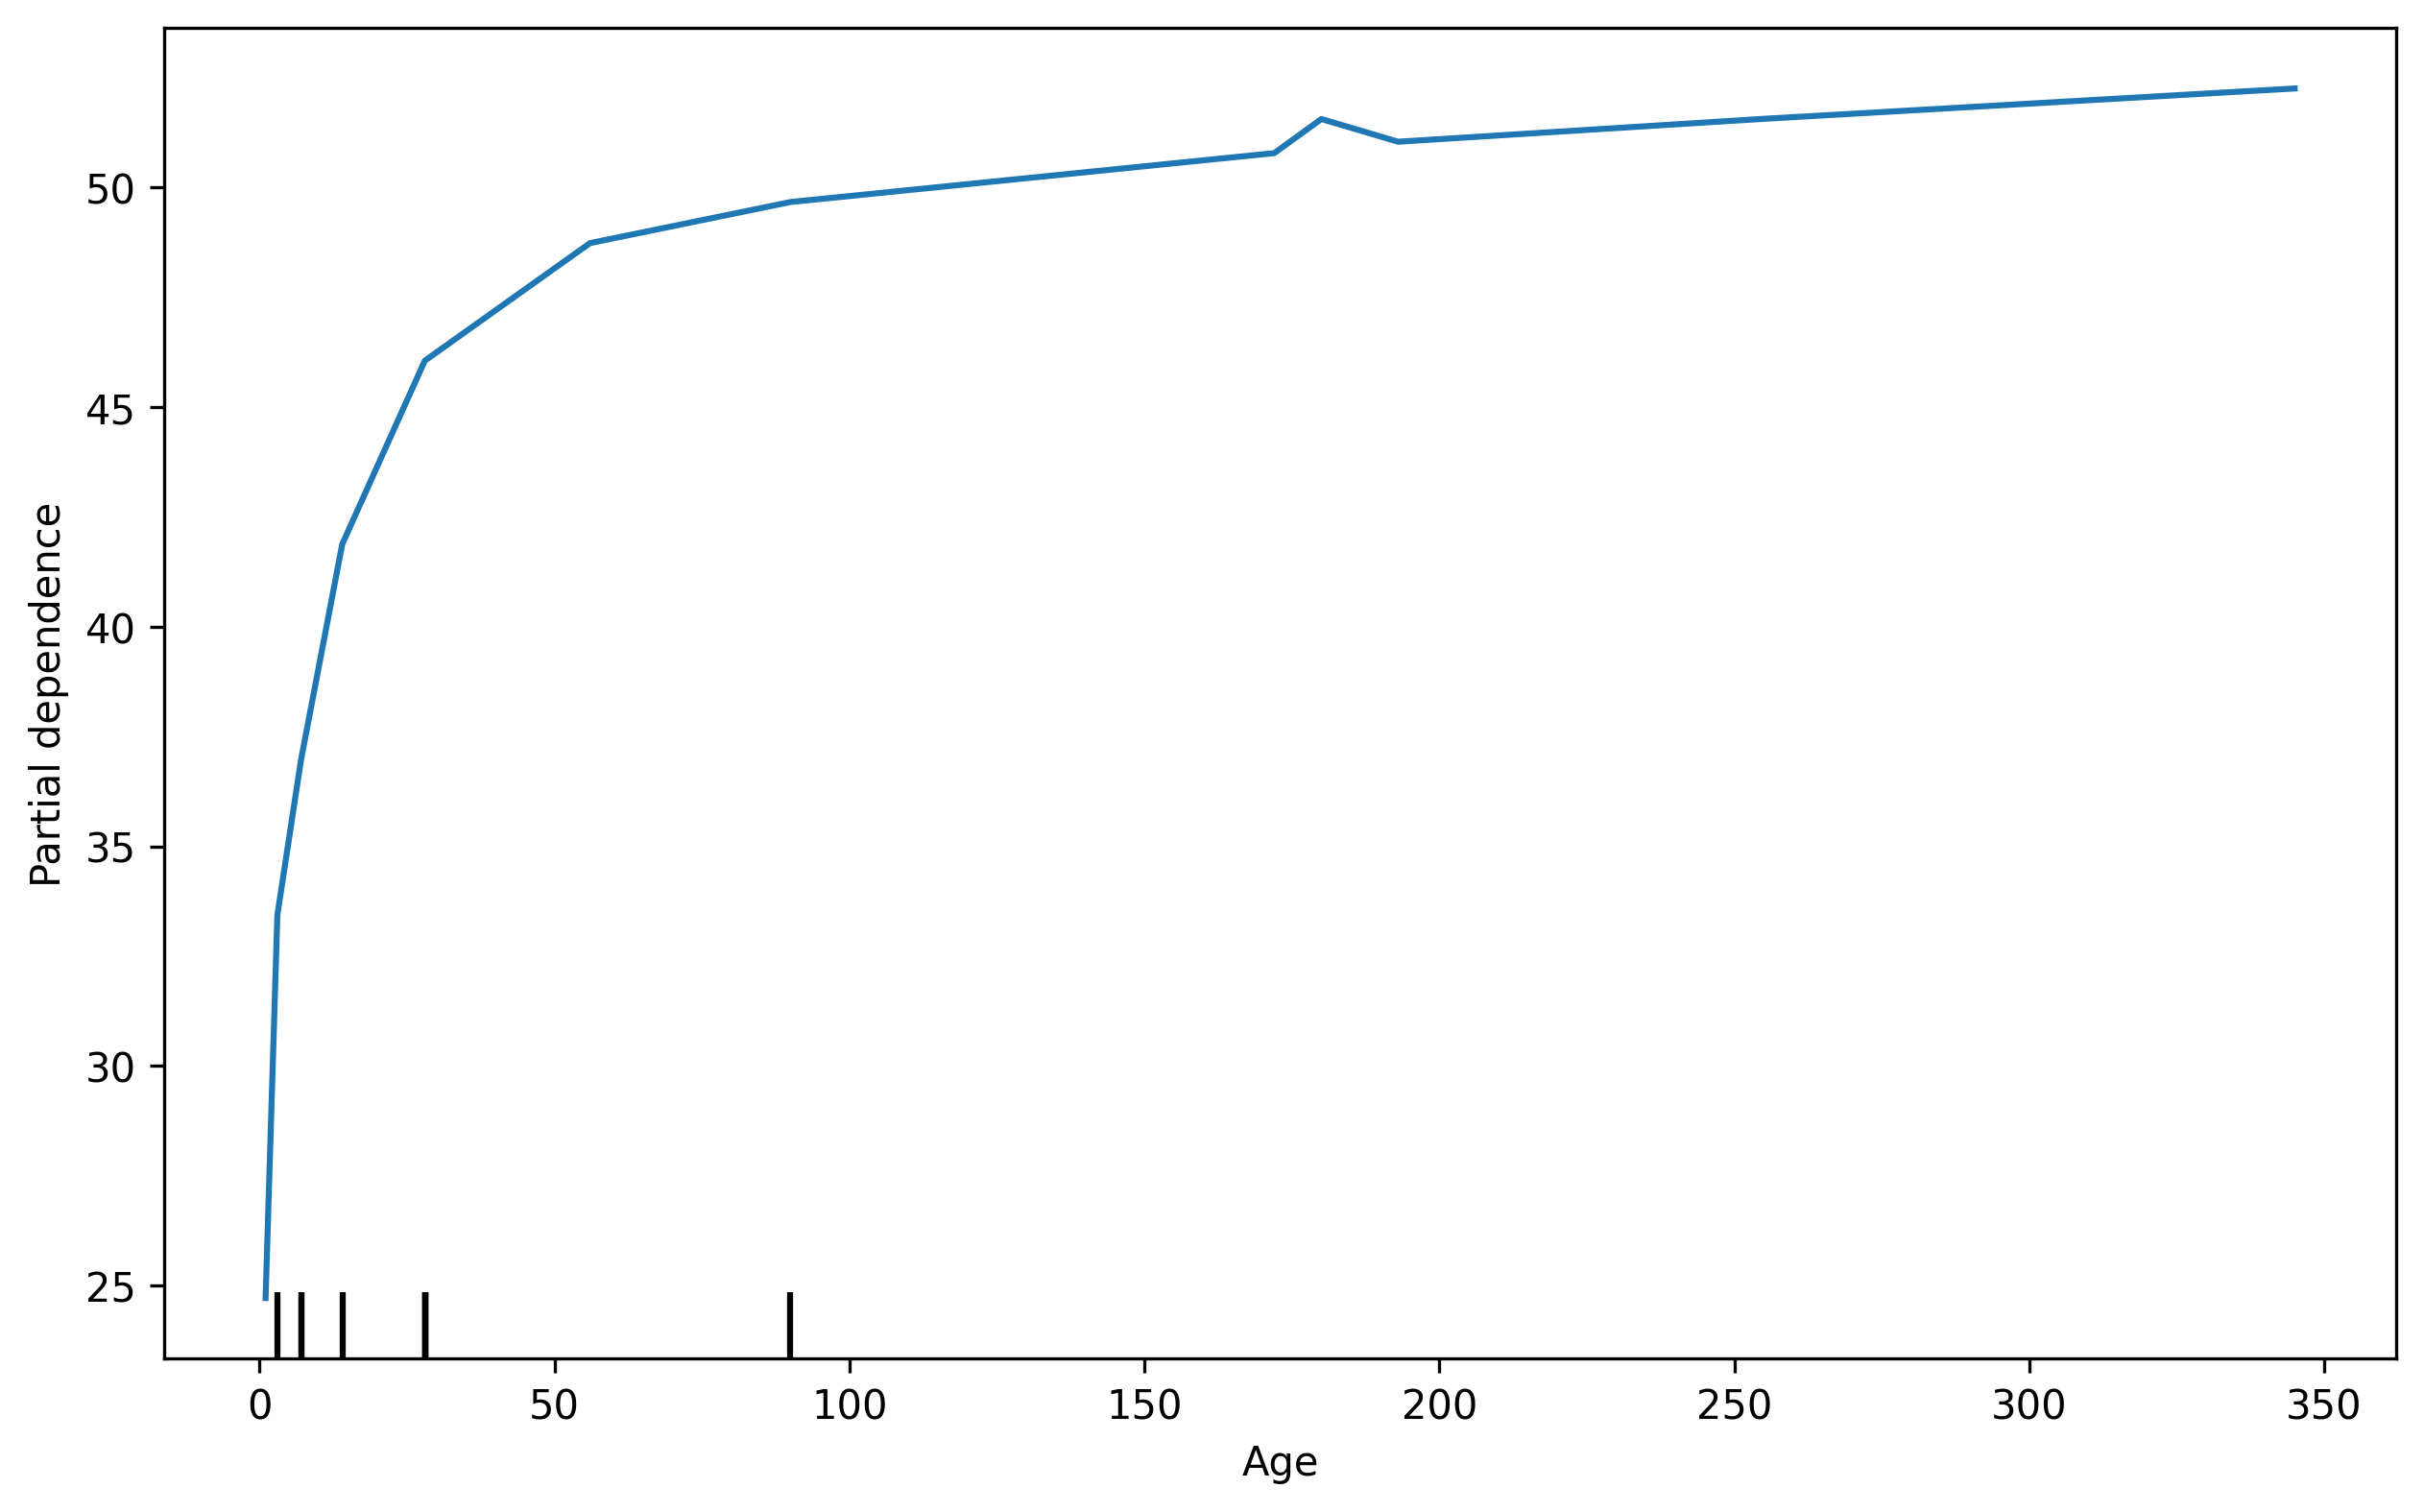

In [ ]:
model = xgb.XGBRegressor()
model.fit(X, y)


fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
pdp = PartialDependenceDisplay.from_estimator(model, X, features=['Cem'], ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
pdp = PartialDependenceDisplay.from_estimator(model, X, features=['W/B'], ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
pdp = PartialDependenceDisplay.from_estimator(model, X, features=['FA'], ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
pdp = PartialDependenceDisplay.from_estimator(model, X, features=['CA'], ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
pdp = PartialDependenceDisplay.from_estimator(model, X, features=['RCA'], ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
pdp = PartialDependenceDisplay.from_estimator(model, X, features=['SCM'], ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
pdp = PartialDependenceDisplay.from_estimator(model, X, features=['SP'], ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
pdp = PartialDependenceDisplay.from_estimator(model, X, features=['NF'], ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
pdp = PartialDependenceDisplay.from_estimator(model, X, features=['Length'], ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
pdp = PartialDependenceDisplay.from_estimator(model, X, features=['Age'], ax=ax)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


{'FT_bamboo': 41.733707427978516,
 'FT_coir': 41.72292709350586,
 'FT_jute': 41.931758880615234,
 'FT_kenaf': 41.715702056884766,
 'FT_ramie': 41.74985313415527,
 'FT_sisal': 41.733463287353516,
 'FT_x': 41.74417686462402}

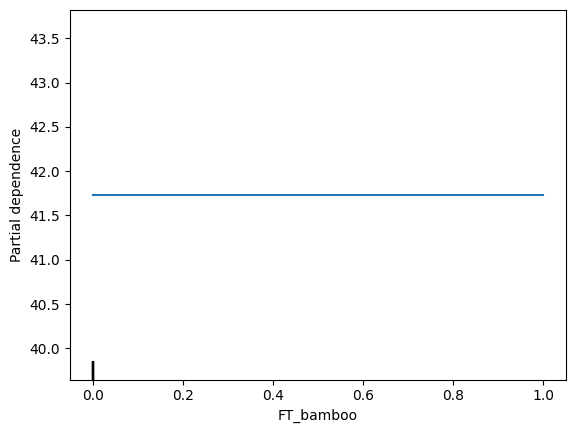

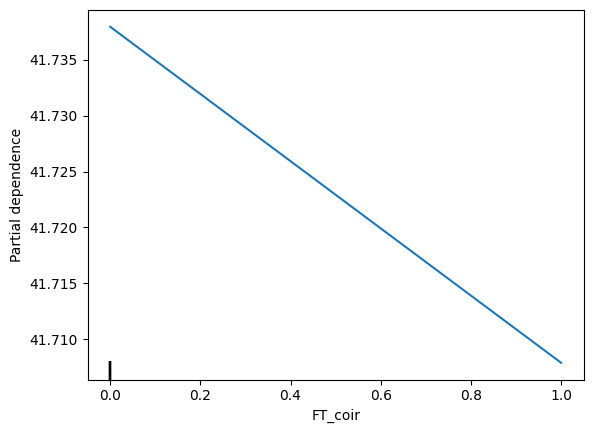

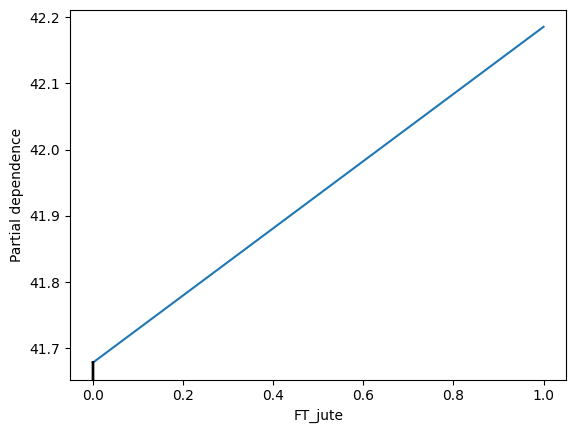

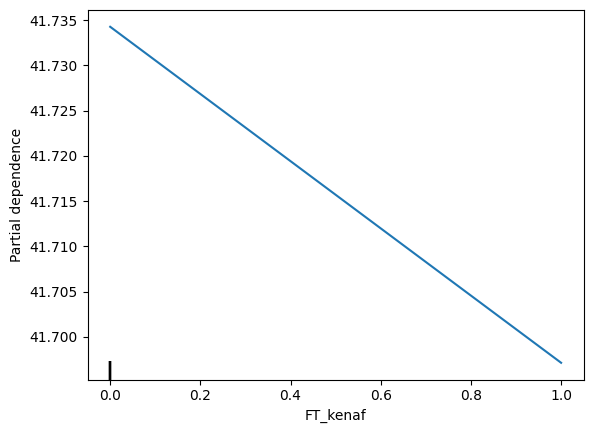

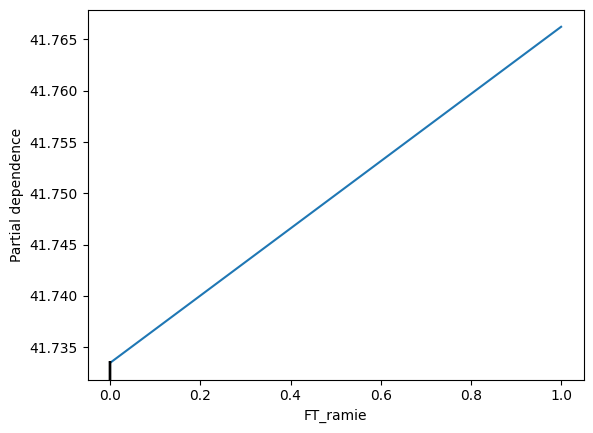

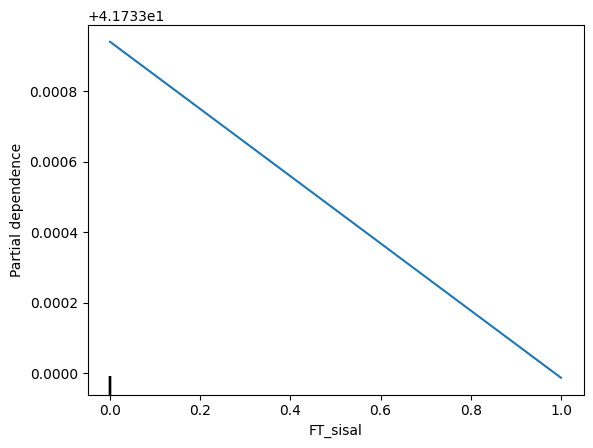

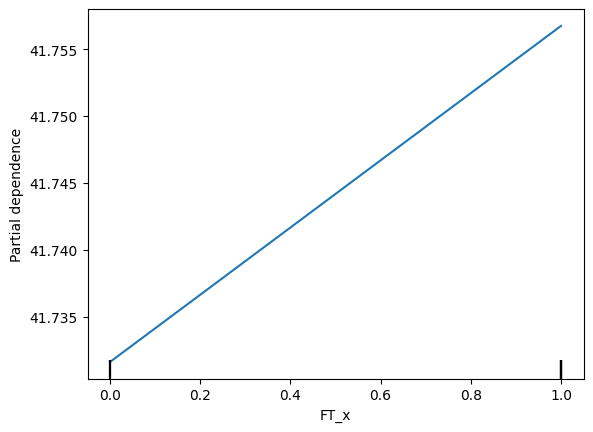

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import xgboost as xgb

# Load the dataset
data_path = 'dataset recycled aggregate natural fiber.csv'
data = pd.read_csv(data_path)

# Loading the dataset and setting the target variable and features
data = pd.read_csv(data_path)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Encoding the categorical feature 'FT'
X_encoded = pd.get_dummies(X, columns=['FT'], drop_first=True)

# Identifying the columns related to 'FT'
ft_columns = [col for col in X_encoded.columns if col.startswith('FT_')]

# Training the XGBRegressor model
model = xgb.XGBRegressor()
model.fit(X_encoded, y)

# Calculating Partial Dependence for the 'FT' columns
ft_pdp_values = {}
for feature in ft_columns:
    pdp = PartialDependenceDisplay.from_estimator(model, X_encoded, features=[feature])
    ft_pdp_values[feature] = pdp.pd_results[0]['average'].tolist()

# Calculating the average PDP values for the 'FT' columns
average_pdp_ft = {key: np.mean(value) for key, value in ft_pdp_values.items()}
average_pdp_ft

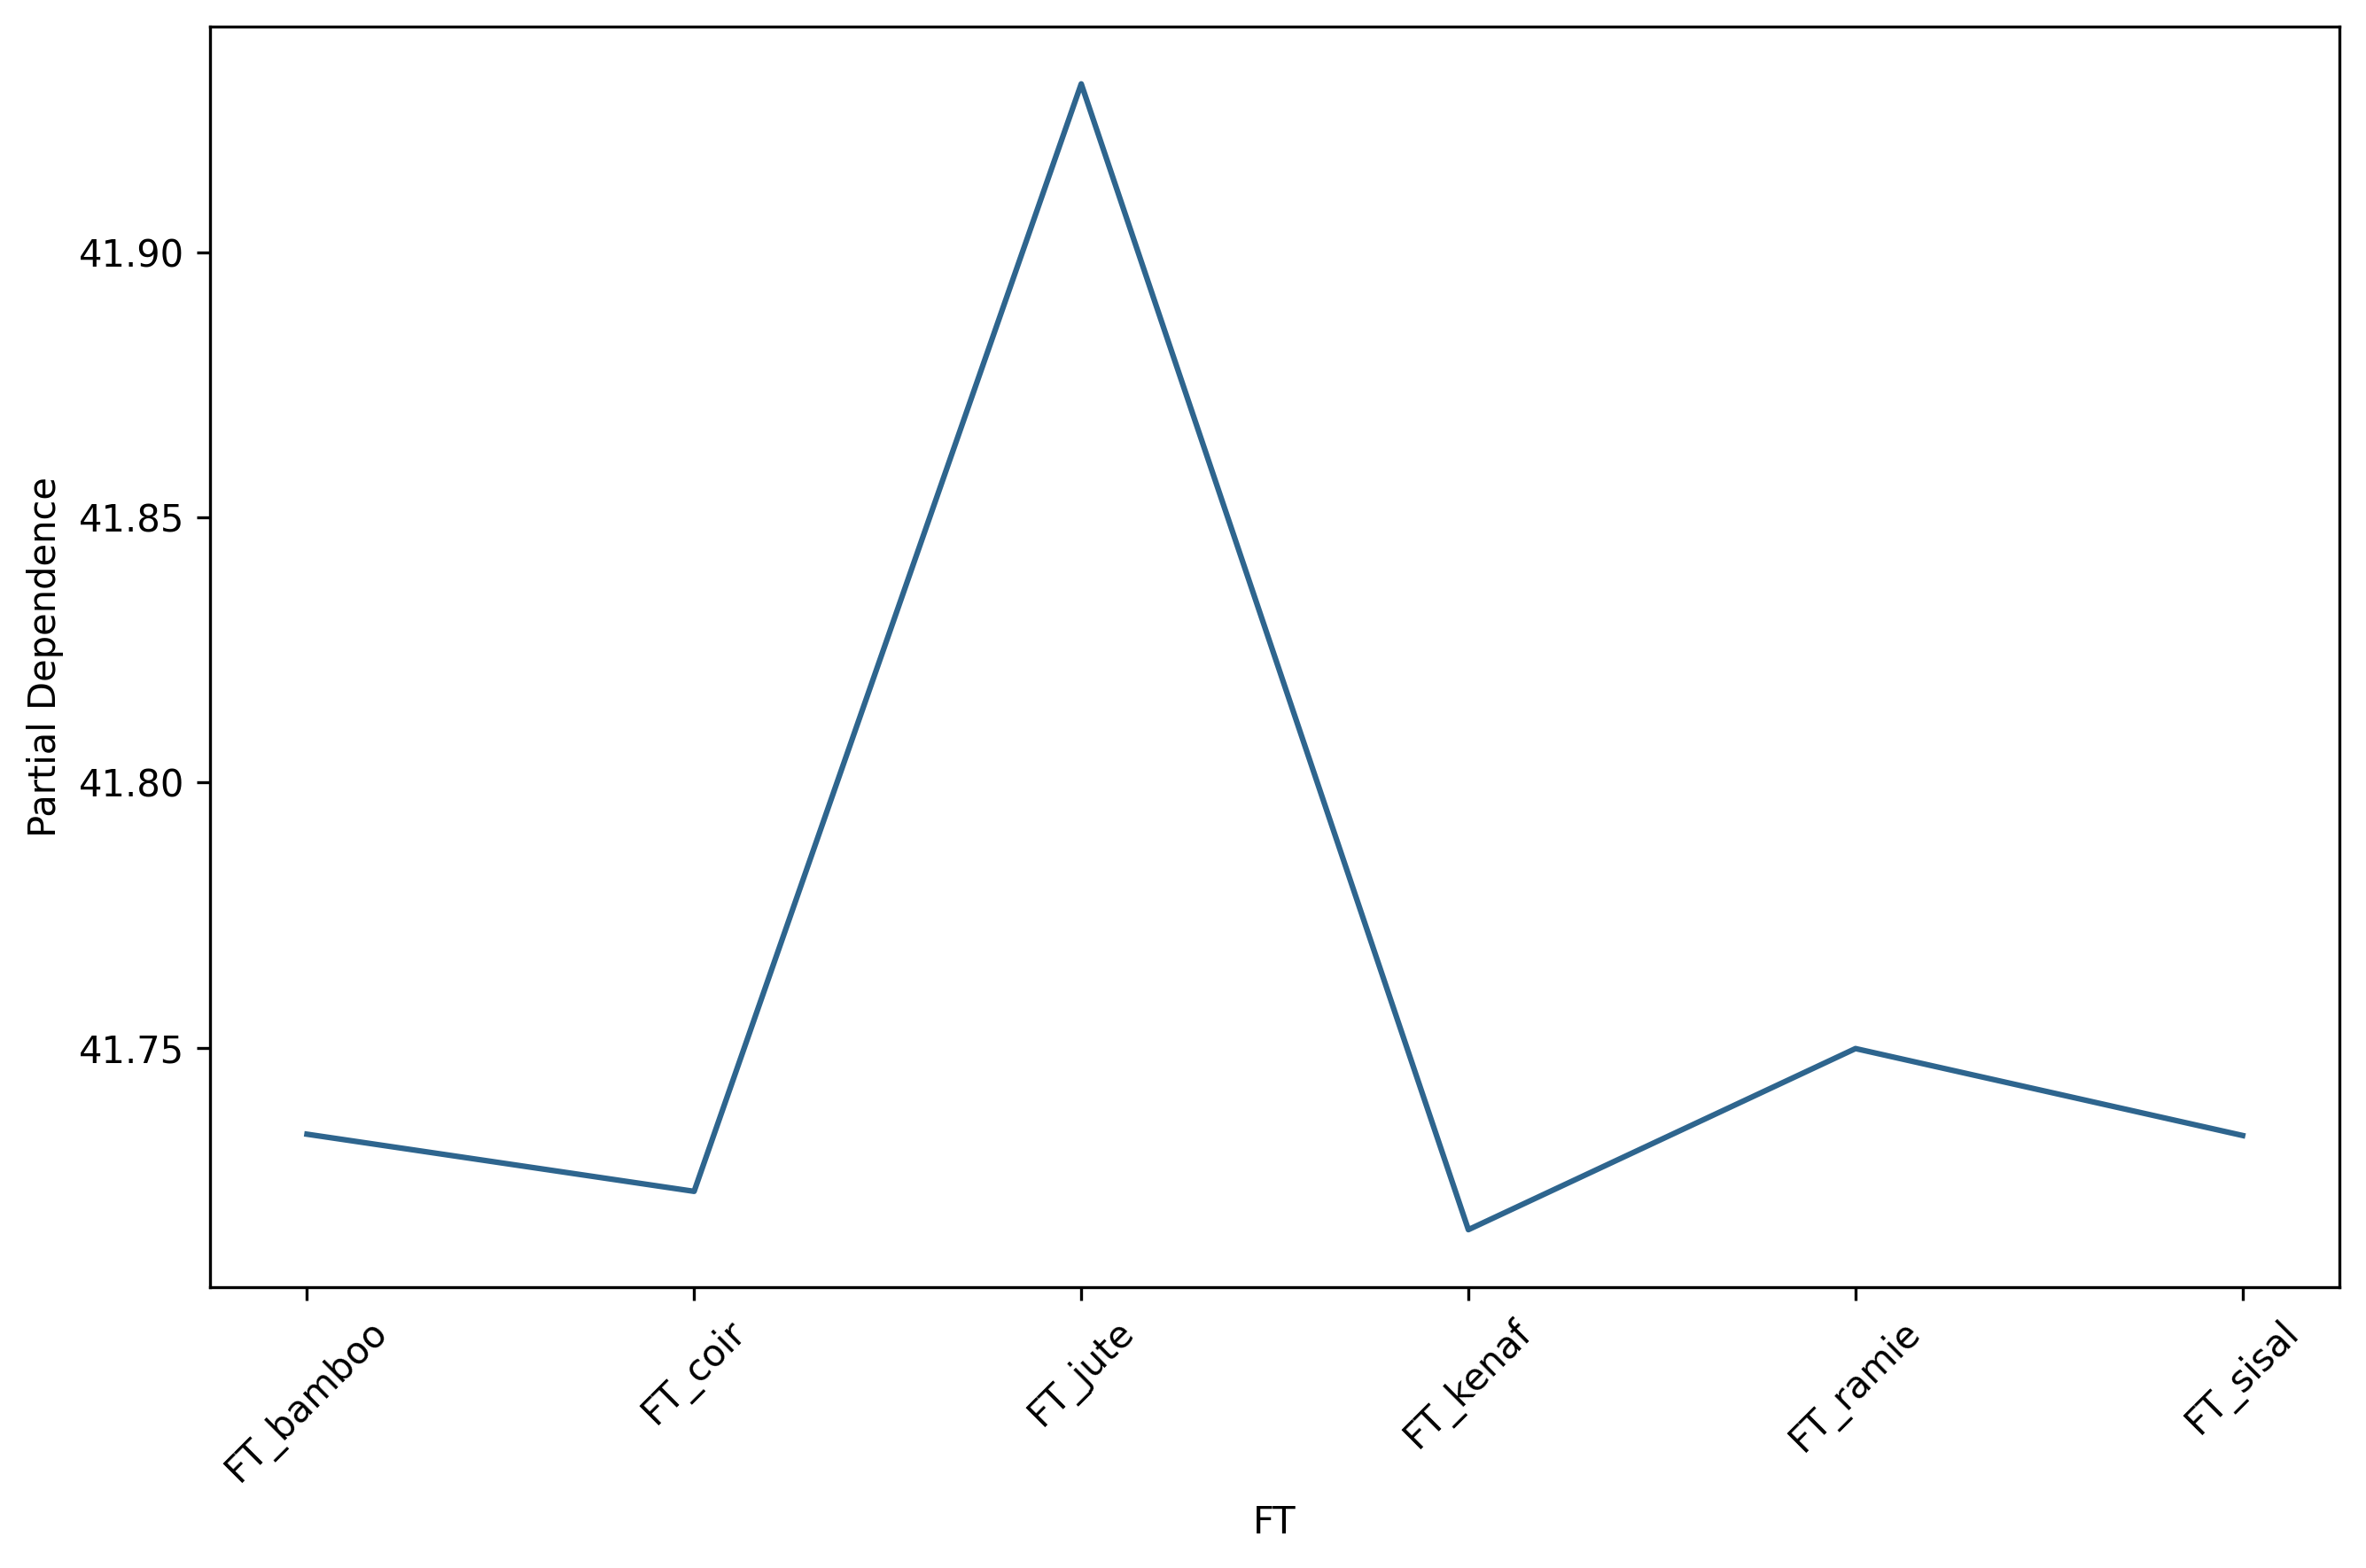

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided PDP values for different fiber types
pdp_values = {
    'FT_bamboo': 41.733707427978516,
    'FT_coir': 41.72292709350586,
    'FT_jute': 41.931758880615234,
    'FT_kenaf': 41.715702056884766,
    'FT_ramie': 41.74985313415527,
    'FT_sisal': 41.733463287353516
}

# Extracting fiber types and their corresponding average PDP values
fiber_types = list(pdp_values.keys())
average_pdp = list(pdp_values.values())

# Plotting the line graph
plt.figure(figsize=(9, 6), dpi=300)
plt.plot(fiber_types, average_pdp, color='#2e658e')
plt.xlabel('FT')
plt.ylabel('Partial Dependence')
plt.grid(False)  # Removing the grid
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(True)  # Showing the top axis
plt.gca().spines['right'].set_visible(True)  # Showing the right axis
plt.tight_layout()
plt.show()

In [ ]:
def pdp_custom_3D(estimated_model, X, y, n_splits, target_name_1, target_name_2, prefit=True, X_train=None, y_train=None):

    if not prefit:
        try:
            estimated_model.fit(X_train, y_train)
        except Exception as e:
            logging.warning(f"Estimated model must have fit method. Error: {e}")

    x_max_1 = X[target_name_1].max()
    x_min_1 = X[target_name_1].min()
    x_max_2 = X[target_name_2].max()
    x_min_2 = X[target_name_2].min()

    X_copy = X.copy()

    step_1 = abs(x_max_1 - x_min_1) / n_splits
    step_2 = abs(x_max_2 - x_min_2) / n_splits

    x_axis = int(n_splits + 1)
    y_axis = int(n_splits + 1)
    s = (x_axis, y_axis)
    PDP_result = np.zeros(s)

    counter_1 = x_min_1
    counter_2 = x_min_2

    for i in range(n_splits + 1):
        X_copy[target_name_1] = counter_1 + i * step_1

        for j in range(n_splits + 1):
            X_copy[target_name_2] = counter_2 + j * step_2
            temp = estimated_model.predict(X_copy)
            PDP_result[i][j] = temp.mean()

    X1, X2 = np.meshgrid(np.linspace(x_min_1, x_max_1, n_splits + 1),
                         np.linspace(x_min_2, x_max_2, n_splits + 1))

    fig = plt.figure(figsize=(12, 10), dpi=500)
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surf = ax.plot_surface(X1, X2, PDP_result, cmap='crest', edgecolor='none', alpha=0.9)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    ax.set_xlabel(target_name_1)
    ax.set_ylabel(target_name_2)
    ax.set_zlabel('PDP value')
    ax.grid(False)
    plt.title('3D Partial Dependence Plot')
    plt.show()

# Example usage with your data and model
model = xgb.XGBRegressor().fit(X, y)

features_to_plot = [
    ('Cement (kg/m3)', 'W/B'),
    ('Fine Aggregate (kg/m3)', 'Coarse Aggregate (kg/m3)'),
    ('RCA percentage (%)', 'SCM (kg/m3)'),
    ('SP (kg/m3)', 'Natural fiber (%)'),
    ('Length (mm)', 'Age (day)'),
    ('RCA percentage (%)', 'Coarse Aggregate (kg/m3)')
]

for feature_1, feature_2 in features_to_plot:
    pdp_custom_3D(model, X, y, n_splits=10, target_name_1=feature_1, target_name_2=feature_2, prefit=True)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:FT: object